In [2]:
import pandas as pd
import random as random
import datetime
import numpy as np
import gzip
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calplot
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
from pathlib import Path


In [3]:
# Generate images here
Path('./gen').mkdir(parents=True, exist_ok=True)

Import all data from csv.gz files and merge everything in one dataframe merged_df:

In [15]:
timeval = ['time', 'value']
#files = ['data/heatpump_temperature_1.csv.gz', 'data/heatpump_temperature_2.csv.gz', 'data/heatpump_temperature_3.csv.gz', 'data/heatpump_temperature_4.csv.gz', 'data/heatpump_temperature_5.csv.gz', 'data/heatpump_temperature_6.csv.gz', 'data/heatpump_return_external.csv.gz', 'data/heatpump_hot_gas.csv.gz',  'data/heatpump_probe_in.csv.gz', 'data/heatpump_mk1.csv.gz', 'data/heatpump_starts_compressor1.csv.gz', 'data/heatpump_state.csv.gz', 'data/heatpump_extended_state.csv.gz']
#cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'starts_compressor1', 'state', 'extended_state']

files = ['data/heatpump_temperature_1.csv.gz', 'data/heatpump_temperature_2.csv.gz', 'data/heatpump_temperature_3.csv.gz', 'data/heatpump_temperature_4.csv.gz', 'data/heatpump_temperature_5.csv.gz', 'data/heatpump_temperature_6.csv.gz', 'data/heatpump_return_external.csv.gz', 'data/heatpump_hot_gas.csv.gz',  'data/heatpump_probe_in.csv.gz', 'data/heatpump_mk1.csv.gz', 'data/heatpump_state.csv.gz', 'data/heatpump_extended_state.csv.gz']
cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'state', 'extended_state']

state_converter = lambda x: (sys.intern(x.split(":")[0]))
converters = {'data/heatpump_state.csv.gz': state_converter, 'data/heatpump_extended_state.csv.gz': state_converter}

merged_df = pd.DataFrame()

for i, file in enumerate(files):
    print(file)
    with gzip.open(file, "rb") as f:
        df = pd.read_csv(f, sep=';', parse_dates=True, index_col=timeval[0], names=timeval, converters={timeval[1]: converters.get(file)})

    df['value'] = pd.arrays.SparseArray(df['value'].values) # , dtype=df['value'].dtype)

    # Remove all "duplicates" during time. This is esp. useful for state and extended_state which would otherwise use a huge amount of memory.
    df = df[~(df[['value']] == df[['value']].shift()).all(axis=1)]

    # Rename column to actual name
    df.rename(columns={"value": cols[i]}, inplace=True)

    print(df)
    df.info(verbose=False)

    merged_df = merged_df.merge(df, how='outer', left_index=True, right_index=True)


data/heatpump_temperature_1.csv.gz
                     outside
time                        
2016-01-16 14:35:50     13.8
2016-01-16 14:36:00     13.9
2016-01-16 14:36:50     13.8
2016-01-16 14:37:01     13.9
2016-01-16 14:37:51     13.8
...                      ...
2020-12-24 22:57:30     11.9
2020-12-24 23:03:14     12.0
2020-12-24 23:03:24     11.9
2020-12-24 23:05:35     12.0
2020-12-24 23:05:45     11.9

[2070634 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070634 entries, 2016-01-16 14:35:50 to 2020-12-24 23:05:45
Columns: 1 entries, outside to outside
dtypes: Sparse[float64, nan](1)
memory usage: 39.5 MB
data/heatpump_temperature_2.csv.gz
                     return
time                       
2016-01-16 14:36:20    28.9
2016-01-16 14:36:30    28.8
2016-01-16 14:36:40    28.9
2016-01-16 14:44:34    28.8
2016-01-16 14:44:45    28.7
...                     ...
2020-12-25 01:02:01    21.4
2020-12-25 01:02:11    21.3
2020-12-25 01:04:12    21.4
2020-12-25 

In [16]:

display(merged_df)
merged_df.info(verbose=False)



outside  return  reference_return  supply  \
time                                                             
2016-01-16 14:35:50     13.8     NaN               NaN    34.0   
2016-01-16 14:36:00     13.9     NaN               NaN    34.1   
2016-01-16 14:36:10      NaN     NaN               NaN    34.2   
2016-01-16 14:36:20      NaN    28.9               NaN     NaN   
2016-01-16 14:36:30      NaN    28.8               NaN    34.3   
...                      ...     ...               ...     ...   
2020-12-25 01:04:22      NaN     NaN               NaN    20.7   
2020-12-25 01:04:32      NaN    21.5               NaN    21.1   
2020-12-25 01:04:42      NaN     NaN               NaN    21.3   
2020-12-25 01:04:52      NaN    21.6               NaN    21.4   
2020-12-25 01:05:02      NaN     NaN               NaN    21.5   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2016-01-16 14:35:50                     NaN           NaN              NaN   
2016-01-16 14:36:00                     NaN          38.5              NaN   
2016-01-16 14:36:10                     NaN          38.6              NaN   
2016-01-16 14:36:20                     NaN          38.5              NaN   
2016-01-16 14:36:30                     NaN          38.6              NaN   
...                                     ...           ...              ...   
2020-12-25 01:04:22                     NaN           NaN              NaN   
2020-12-25 01:04:32                     NaN           NaN              NaN   
2020-12-25 01:04:42                     NaN           NaN              NaN   
2020-12-25 01:04:52                     NaN           NaN              NaN   
2020-12-25 01:05:02                     NaN           NaN              NaN   

                     hot_gas  probe_in   mk1             state extended_state  
time                                                                           
2016-01-16 14:35:50     60.9       3.7   NaN  Heatpump running        heating  
2016-01-16 14:36:00     61.0       NaN   NaN               NaN            NaN  
2016-01-16 14:36:10      NaN       NaN   NaN               NaN            NaN  
2016-01-16 14:36:20      NaN       NaN   NaN               NaN            NaN  
2016-01-16 14:36:30      NaN       NaN   NaN               NaN            NaN  
...                      ...       ...   ...               ...            ...  
2020-12-25 01:04:22      NaN       NaN  22.1               NaN            NaN  
2020-12-25 01:04:32      NaN       5.3  22.0               NaN            NaN  
2020-12-25 01:04:42      NaN       NaN  21.9               NaN            NaN  
2020-12-25 01:04:52      NaN       NaN  21.8               NaN            NaN  
2020-12-25 01:05:02      NaN       NaN  21.9               NaN            NaN  

[9178756 rows x 12 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9178756 entries, 2016-01-16 14:35:50 to 2020-12-25 01:05:02
Columns: 12 entries, outside to extended_state
dtypes: Sparse[float64, nan](10), Sparse[object, nan](2)
memory usage: 234.2 MB


Convert categorical variables state and extended_state to indicator variables:

In [17]:
dummies_state = pd.get_dummies(merged_df['state'], sparse=False, prefix='s', dummy_na=True)
dummies_state.loc[dummies_state['s_nan'] == 1, dummies_state.columns] = np.nan

# Convert the dummy columns to sparse and use them in merged_df
merged_df['heatpump_running'] = dummies_state['s_Heatpump running'].astype('Sparse')

# Free some memory
merged_df.drop(columns=['state'], inplace=True)
del dummies_state

dummies_extended_state = pd.get_dummies(merged_df['extended_state'], sparse=False, prefix='es', dummy_na=True)
dummies_extended_state.loc[dummies_extended_state['es_nan'] == 1, dummies_extended_state.columns] = np.nan

# Convert the dummy columns to sparse and use them in merged_df
compressor_heating_s = ((dummies_extended_state['es_compressor heating up'] == 1) | (dummies_extended_state['es_unknown'] == 1)).astype(float)
merged_df['compressor_heating'] = ((compressor_heating_s.loc[compressor_heating_s.shift() != compressor_heating_s])).astype('Sparse')

merged_df['heatpump_heating'] = dummies_extended_state['es_heating'].astype('Sparse')
merged_df['heatpump_servicewater'] = dummies_extended_state['es_service water'].astype('Sparse')
merged_df['defrosting'] = dummies_extended_state['es_defrosting'].astype('Sparse')

# Free some memory
merged_df.drop(columns=['extended_state'], inplace=True)
del dummies_extended_state

display(merged_df)
merged_df.info(verbose=False)



outside  return  reference_return  supply  \
time                                                             
2016-01-16 14:35:50     13.8     NaN               NaN    34.0   
2016-01-16 14:36:00     13.9     NaN               NaN    34.1   
2016-01-16 14:36:10      NaN     NaN               NaN    34.2   
2016-01-16 14:36:20      NaN    28.9               NaN     NaN   
2016-01-16 14:36:30      NaN    28.8               NaN    34.3   
...                      ...     ...               ...     ...   
2020-12-25 01:04:22      NaN     NaN               NaN    20.7   
2020-12-25 01:04:32      NaN    21.5               NaN    21.1   
2020-12-25 01:04:42      NaN     NaN               NaN    21.3   
2020-12-25 01:04:52      NaN    21.6               NaN    21.4   
2020-12-25 01:05:02      NaN     NaN               NaN    21.5   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2016-01-16 14:35:50                     NaN           NaN              NaN   
2016-01-16 14:36:00                     NaN          38.5              NaN   
2016-01-16 14:36:10                     NaN          38.6              NaN   
2016-01-16 14:36:20                     NaN          38.5              NaN   
2016-01-16 14:36:30                     NaN          38.6              NaN   
...                                     ...           ...              ...   
2020-12-25 01:04:22                     NaN           NaN              NaN   
2020-12-25 01:04:32                     NaN           NaN              NaN   
2020-12-25 01:04:42                     NaN           NaN              NaN   
2020-12-25 01:04:52                     NaN           NaN              NaN   
2020-12-25 01:05:02                     NaN           NaN              NaN   

                     hot_gas  probe_in   mk1  heatpump_running  \
time                                                             
2016-01-16 14:35:50     60.9       3.7   NaN               1.0   
2016-01-16 14:36:00     61.0       NaN   NaN               NaN   
2016-01-16 14:36:10      NaN       NaN   NaN               NaN   
2016-01-16 14:36:20      NaN       NaN   NaN               NaN   
2016-01-16 14:36:30      NaN       NaN   NaN               NaN   
...                      ...       ...   ...               ...   
2020-12-25 01:04:22      NaN       NaN  22.1               NaN   
2020-12-25 01:04:32      NaN       5.3  22.0               NaN   
2020-12-25 01:04:42      NaN       NaN  21.9               NaN   
2020-12-25 01:04:52      NaN       NaN  21.8               NaN   
2020-12-25 01:05:02      NaN       NaN  21.9               NaN   

                     compressor_heating  heatpump_heating  \
time                                                        
2016-01-16 14:35:50                 0.0               1.0   
2016-01-16 14:36:00                 NaN               NaN   
2016-01-16 14:36:10                 NaN               NaN   
2016-01-16 14:36:20                 NaN               NaN   
2016-01-16 14:36:30                 NaN               NaN   
...                                 ...               ...   
2020-12-25 01:04:22                 NaN               NaN   
2020-12-25 01:04:32                 NaN               NaN   
2020-12-25 01:04:42                 NaN               NaN   
2020-12-25 01:04:52                 NaN               NaN   
2020-12-25 01:05:02                 NaN               NaN   

                     heatpump_servicewater  defrosting  
time                                                    
2016-01-16 14:35:50                    0.0         0.0  
2016-01-16 14:36:00                    NaN         NaN  
2016-01-16 14:36:10                    NaN         NaN  
2016-01-16 14:36:20                    NaN         NaN  
2016-01-16 14:36:30                    NaN         NaN  
...                                    ...         ...  
2020-12-25 01:04:22                   

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9178756 entries, 2016-01-16 14:35:50 to 2020-12-25 01:05:02
Columns: 15 entries, outside to defrosting
dtypes: Sparse[float64, nan](15)
memory usage: 236.7 MB


First look at the data

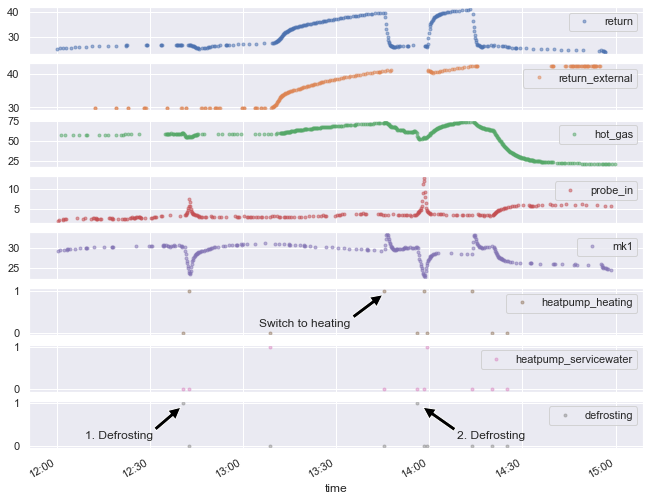

In [18]:

sns.set(rc={'figure.figsize':(20, 15)})

#merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]
df_plot = merged_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00']

cols_plot = ['return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'heatpump_heating', 'heatpump_servicewater', 'defrosting']
axes = df_plot[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes[::-1]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

#axes[0].annotate('Switch to heating', ha = 'center', va = 'bottom', xytext = (pd.to_datetime('2020-12-10 13:20:00'), 28.0),xy = (pd.to_datetime('2020-12-10 13:45:00'), 35),arrowprops = {'facecolor' : 'black'})
axes[5].annotate('Switch to heating', ha = 'center', va = 'bottom', xytext = (pd.to_datetime('2020-12-10 13:20:00'), 0.1),xy = (pd.to_datetime('2020-12-10 13:45:00'), 0.9),arrowprops = {'facecolor' : 'black'})
axes[7].annotate('1. Defrosting', ha = 'center', va = 'bottom', xytext = (pd.to_datetime('2020-12-10 12:20:00'), 0.1),xy = (pd.to_datetime('2020-12-10 12:40:00'), 0.9),arrowprops = {'facecolor' : 'black'})
axes[7].annotate('2. Defrosting', ha = 'center', va = 'bottom', xytext = (pd.to_datetime('2020-12-10 14:20:00'), 0.1),xy = (pd.to_datetime('2020-12-10 13:58:00'), 0.9),arrowprops = {'facecolor' : 'black'})
plt.gcf().savefig('./gen/defrosting_20201210.png')
plt.show()
#display(df_plot[df_plot['defrosting']==1])


In [19]:
#merged_df['2016-01-16 14:42:00' : '2016-01-16 14:43:00']
merged_df['defrosting'].sum()


1853.0

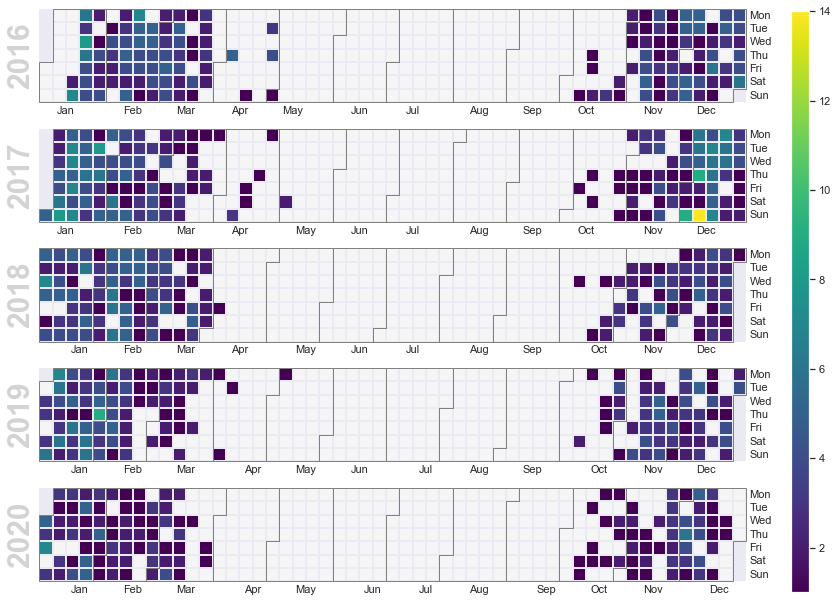

In [20]:
calplot.calplot(merged_df['defrosting'].sparse.to_dense())
plt.gcf().savefig('./gen/overview_defrosting.png')
plt.show()


Resample dataframe to one value every minute. Use mean values if multiple values per minute exists. Use past value if no column value exists for a minute. If no value exists for all columns, no resampled row is generated. All rows with NaNs will be dropped afterwards (e.g. at the beginning).

In [21]:
# Resample sparse df to dense df with 1min mean values
resampled_df = merged_df.sparse.to_dense().ffill().resample('1Min').mean().dropna()

# Reset all "binary" columns to 1 if not 0
resampled_df['compressor_heating'][resampled_df['compressor_heating'] > 0] = 1
resampled_df['heatpump_heating'][resampled_df['heatpump_heating'] > 0] = 1
resampled_df['heatpump_servicewater'][resampled_df['heatpump_servicewater'] > 0] = 1
resampled_df['heatpump_running'][resampled_df['heatpump_running'] > 0] = 1
resampled_df['defrosting'][resampled_df['defrosting'] > 0] = 1

# Normale df to be useable for neural nets
normalized_df=(resampled_df-resampled_df.min())/(resampled_df.max()-resampled_df.min())

display(normalized_df)
normalized_df.info(verbose=False, memory_usage="deep")
display(resampled_df)
resampled_df.info(verbose=False, memory_usage="deep")

outside    return  reference_return    supply  \
time                                                                  
2016-01-17 15:00:00  0.410628  0.308029          0.465385  0.423645   
2016-01-17 15:01:00  0.410628  0.308029          0.465385  0.423416   
2016-01-17 15:02:00  0.410628  0.295620          0.000000  0.433703   
2016-01-17 15:03:00  0.410628  0.246229          0.000000  0.484378   
2016-01-17 15:04:00  0.410628  0.233090          0.000000  0.465328   
...                       ...       ...               ...       ...   
2020-12-25 01:01:00  0.342995  0.093431          0.000000  0.140513   
2020-12-25 01:02:00  0.342995  0.093431          0.000000  0.141084   
2020-12-25 01:03:00  0.342995  0.091971          0.000000  0.139941   
2020-12-25 01:04:00  0.342995  0.096350          0.000000  0.127368   
2020-12-25 01:05:00  0.342995  0.100730          0.000000  0.138798   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2016-01-17 15:00:00                0.670886      0.534155         0.320755   
2016-01-17 15:01:00                0.670886      0.534155         0.320755   
2016-01-17 15:02:00                0.670886      0.534155         0.322102   
2016-01-17 15:03:00                0.670886      0.534155         0.330638   
2016-01-17 15:04:00                0.632911      0.534155         0.347709   
...                                     ...           ...              ...   
2020-12-25 01:01:00                0.620253      0.534155         0.539084   
2020-12-25 01:02:00                0.620253      0.534155         0.539084   
2020-12-25 01:03:00                0.620253      0.534155         0.539084   
2020-12-25 01:04:00                0.620253      0.534155         0.539084   
2020-12-25 01:05:00                0.620253      0.534155         0.539084   

                      hot_gas  probe_in       mk1  heatpump_running  \
time                                                                  
2016-01-17 15:00:00  0.664200  0.167127  0.438922               1.0   
2016-01-17 15:01:00  0.664200  0.167127  0.440120               1.0   
2016-01-17 15:02:00  0.665639  0.167127  0.440120               1.0   
2016-01-17 15:03:00  0.670915  0.167127  0.438124               1.0   
2016-01-17 15:04:00  0.673025  0.165484  0.436128               1.0   
...                       ...       ...       ...               ...   
2020-12-25 01:01:00  0.115113  0.243989  0.113772               0.0   
2020-12-25 01:02:00  0.115113  0.242018  0.113772               0.0   
2020-12-25 01:03:00  0.115113  0.243989  0.113772               0.0   
2020-12-25 01:04:00  0.115113  0.241361  0.114770               0.0   
2020-12-25 01:05:00  0.115113  0.240047  0.110778               0.0   

                     compressor_heating  heatpump_heating  \
time                                                        
2016-01-17 15:00:00                 0.0               1.0   
2016-01-17 15:01:00                 0.0               1.0   
2016-01-17 15:02:00                 0.0               0.0   
2016-01-17 15:03:00                 0.0               0.0   
2016-01-17 15:04:00                 0.0               0.0   
...                                 ...               ...   
2020-12-25 01:01:00                 0.0               0.0   
2020-12-25 01:02:00                 0.0               0.0   
2020-12-25 01:03:00                 0.0               0.0   
2020-12-25 01:04:00                 0.0               0.0   
2020-12-25 01:05:00                 0.0               0.0   

                     heatpump_servicewater  defrosting  
time                                                    
2016-01-17 15:00:00                    0.0         0.0  
2016-01-17 15:01:00                    0.0         0.0  
2016-01-17 15:02:00                    1.0         0.0  
2016-01-17 15:03:00                    1.0         0.0  
2016-01-17 15:04:00    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2365646 entries, 2016-01-17 15:00:00 to 2020-12-25 01:05:00
Columns: 15 entries, outside to defrosting
dtypes: float64(15)
memory usage: 288.8 MB


outside     return  reference_return     supply  \
time                                                                   
2016-01-17 15:00:00     13.3  28.700000              27.1  33.960000   
2016-01-17 15:01:00     13.3  28.700000              27.1  33.950000   
2016-01-17 15:02:00     13.3  28.275000              15.0  34.400000   
2016-01-17 15:03:00     13.3  26.583333              15.0  36.616667   
2016-01-17 15:04:00     13.3  26.133333              15.0  35.783333   
...                      ...        ...               ...        ...   
2020-12-25 01:01:00     11.9  21.350000              15.0  21.575000   
2020-12-25 01:02:00     11.9  21.350000              15.0  21.600000   
2020-12-25 01:03:00     11.9  21.300000              15.0  21.550000   
2020-12-25 01:04:00     11.9  21.450000              15.0  21.000000   
2020-12-25 01:05:00     11.9  21.600000              15.0  21.500000   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2016-01-17 15:00:00                    45.0          42.3        29.600000   
2016-01-17 15:01:00                    45.0          42.3        29.600000   
2016-01-17 15:02:00                    45.0          42.3        29.650000   
2016-01-17 15:03:00                    45.0          42.3        29.966667   
2016-01-17 15:04:00                    43.5          42.3        30.600000   
...                                     ...           ...              ...   
2020-12-25 01:01:00                    43.0          42.3        37.700000   
2020-12-25 01:02:00                    43.0          42.3        37.700000   
2020-12-25 01:03:00                    43.0          42.3        37.700000   
2020-12-25 01:04:00                    43.0          42.3        37.700000   
2020-12-25 01:05:00                    43.0          42.3        37.700000   

                       hot_gas  probe_in        mk1  heatpump_running  \
time                                                                    
2016-01-17 15:00:00  61.200000  1.600000  32.860000               1.0   
2016-01-17 15:01:00  61.200000  1.600000  32.900000               1.0   
2016-01-17 15:02:00  61.325000  1.600000  32.900000               1.0   
2016-01-17 15:03:00  61.783333  1.600000  32.833333               1.0   
2016-01-17 15:04:00  61.966667  1.516667  32.766667               1.0   
...                        ...       ...        ...               ...   
2020-12-25 01:01:00  13.500000  5.500000  22.000000               0.0   
2020-12-25 01:02:00  13.500000  5.400000  22.000000               0.0   
2020-12-25 01:03:00  13.500000  5.500000  22.000000               0.0   
2020-12-25 01:04:00  13.500000  5.366667  22.033333               0.0   
2020-12-25 01:05:00  13.500000  5.300000  21.900000               0.0   

                     compressor_heating  heatpump_heating  \
time                                                        
2016-01-17 15:00:00                 0.0               1.0   
2016-01-17 15:01:00                 0.0               1.0   
2016-01-17 15:02:00                 0.0               0.0   
2016-01-17 15:03:00                 0.0               0.0   
2016-01-17 15:04:00                 0.0               0.0   
...                                 ...               ...   
2020-12-25 01:01:00                 0.0               0.0   
2020-12-25 01:02:00                 0.0               0.0   
2020-12-25 01:03:00                 0.0               0.0   
2020-12-25 01:04:00                 0.0               0.0   
2020-12-25 01:05:00                 0.0               0.0   

                     heatpump_servicewater  defrosting  
time                                                    
2016-01-17 15:00:00                    0.0         0.0  
2016-01-17 15:01:00                    0.0         0.0  
2016-01-17 15:02:00                    1.0         0.0  
2016-01-17 15:03:00                    1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2365646 entries, 2016-01-17 15:00:00 to 2020-12-25 01:05:00
Columns: 15 entries, outside to defrosting
dtypes: float64(15)
memory usage: 288.8 MB


A second look at the resampled data:

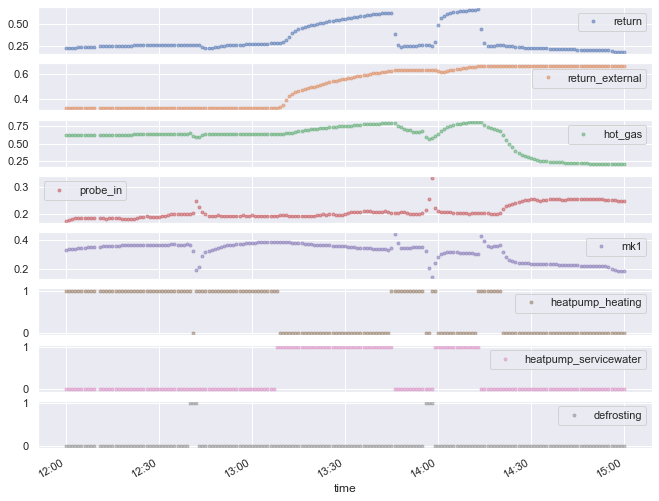

In [22]:

sns.set(rc={'figure.figsize':(20, 15)})

#merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]
df_plot = normalized_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00']
#df_plot = normalized_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00'] # Great visualization of heating before defrosting


cols_plot = ['return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'heatpump_heating', 'heatpump_servicewater', 'defrosting']
axes = df_plot[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes[::-1]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.gcf().savefig('./gen/defrosting_normalized_20201210.png')
plt.show()


Now we have a resampled Pandas dataframe with all data. Let's convert this to a valid Pytorch Dataset. 

In [26]:
class HeatpumpDataset(data.Dataset):
    '''
    Heatpump dataset
    The data extracted is based on a sliding window over all data in the dataframe. The stride is dist_seq_min. The window has the length len_seq_min-len_future_min and goes into sample_x. Another window with an offset of len_future_min is the basis for sample_y. 
    
    The data is extracted in randomized order.
    '''

    def __init__(self, df, input_cols, len_seq_min, len_future_min, dist_seq_min, max_samples = 0, sample_filter=None, date_filter = None, transform=None):
        ''' 
        INPUT
        df - dataframe with heatpump data
        input_cols - columns for sample_x
        len_seq_min - Full length (past+future) for sliding window
        len_future_min - Number of minutes in the future for sample_y
        dist_seq_min: the stride
        max_samples: Maximum number of samples to be extracted or 0 if all samples should be extracted.
        sample_filter (callable, optional): filter samples
        date_filter (callable, optional): Filter timestamps for sample extraction
        transform (callable, optional): Transform to be applied so samples
        '''
        self.df = df
        self.input_cols = input_cols
        self.len_seq_min = len_seq_min
        self.len_future_min = len_future_min
        self.dist_seq_min = dist_seq_min
        self.sample_filter = sample_filter
        self.date_filter = date_filter
        self.transform = transform
        self.samples = []
        self.samples_x = []
        self.samples_y = []

        date_list = pd.date_range(self.df.index[0]-pd.Timedelta(seconds=30), self.df.index[-1],freq='{}min'.format(self.dist_seq_min)).tolist()
        # We need to shuffle the dates, because if we stop after max_samples we would only get early samples from 2016
        random.Random(42).shuffle(date_list)

        for date in date_list:
            # Go through all dates which are not filtered
            if self.date_filter(date):
                sample_df = self.df[date : date+pd.Timedelta(minutes=self.len_seq_min)]

                # Use this sample only if full sequence available
                if (sample_df.shape[0]==self.len_seq_min):

                    # ...and of course if it is not filtered
                    if self.sample_filter(sample_df):
                        self.samples.append(sample_df)

                        # Empty cache
                        self.samples_x.append(None)
                        self.samples_y.append(None)

                        if max_samples > 0 and len(self.samples) >= max_samples:
                            break;

    def __len__(self):
        '''
        Number of extracted samples
        '''
        return len(self.samples)

    def __getitem__(self, idx):
        '''
        Get sample data at index.

        This method is doing most of the heavy lifting, but every result is cached, so later calls will just use the already transformed sample and not retransform everything.

        INPUT
        idx - Index of sample

        OUTPUT
        sample_x - np.Array with sample data, shape: [len(input_cols), len_seq_min - len_future_min]
        sample_y - np.Array with index to class of defrosting happens len_future_min minutes later
                   shape: [len_seq_min - len_future_min]
                   classes: normal, defrosting
        '''
        if torch.is_tensor(idx):
            idx = idx.tolist()

#        print("HeatpumpDataset.__getitem__ ", idx)
        sample_x = self.samples_x[idx]
        sample_y = self.samples_y[idx]

        if sample_x is None or sample_y is None:
            sample_df = self.samples[idx]

            sample_x = sample_df[self.input_cols].iloc[0 : self.len_seq_min - self.len_future_min].to_numpy(dtype=np.float32) # Size: 5

            # sample_y with logits for the last len_seq_min-len_future_min (e.g. 120 - 5 = 115)
            sample_y = torch.empty(self.len_seq_min-self.len_future_min, dtype=torch.long)
            for i in range(self.len_seq_min-self.len_future_min):
    #            print("sample_i: ", i, " # ", i, " # ", i + self.len_future_min)
                sample_y[i] = 1 if sample_df['defrosting'].iloc[i + 1 : i + self.len_future_min + 1].sum() > 0 else 0

    #        print("sample_y: ", sample_y)

            if self.transform:
                sample_x, sample_y = self.transform(sample_x, sample_y)

        self.samples_x[idx] = sample_x
        self.samples_y[idx] = sample_y

        return sample_x, sample_y


Let's create two non-overlapping datasets: train_dataset and test_dataset

We'll just use 5 columns for this excercise and only data from September to April and from 11 am to 6pm. The dataset train_dataset will get all data from every day except the 5th, 10th, 15th,... day of month as those days will go into test_dataset. A random filter will make sure that we'll get roughly a 20 / 80 split of defrosting/non-defrosting chunks in the datasets. Alle samples in the dataset will already be shuffled to make sure that the full timespan (2016-2020) is covered if we reduce the number of samples with max_samples.

This will achieve multiple goals:
- Separation of train and test data
- Usable weights for the two classes not-defrosting / defrosting
- Enough training and testing data
- Not too many features
- Full timespan covered, even with reduced number of samples


In [27]:
len_seq_min = 120
len_future_min = 5
dist_seq_min = 3

# input_cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'compressor_heating', 'heatpump_heating', 'heatpump_servicewater', 'heatpump_running']
# input_cols = ['return', 'supply', 'return_external', 'hot_gas', 'probe_in', 'compressor_heating', 'heatpump_heating', 'heatpump_servicewater', 'heatpump_running', 'defrosting']
input_cols = ['hot_gas', 'probe_in', 'return', 'heatpump_running', 'defrosting']

myrandom = random.Random(42)

# Filter to allow max. ~20% of normal samples without defrosting in the last xxx minutes
filter_normal10 = lambda df: ((df['defrosting'].iloc[len_seq_min - len_future_min : len_seq_min].sum() > 0) or (myrandom.random() > 0.80 ))

# Filter to split training and test data on day of month
filter_train = lambda d: ((d.month >= 9) | (d.month <= 4)) & ((d.hour >= 11) & (d.hour < 18) & ((d.day % 5) != 0)) # all days but the 5th, 10th, 15th, ...
filter_test = lambda d: ((d.month >= 9) | (d.month <= 4)) & ((d.hour >= 11) & (d.hour < 18) & ((d.day % 5) == 0)) # only the 5th, 10th, 15th, ...

train_dataset = HeatpumpDataset(normalized_df, input_cols, len_seq_min, len_future_min, dist_seq_min, max_samples = 0, sample_filter = filter_normal10, date_filter = filter_train)
print("Train dataset: ", len(train_dataset))

test_dataset = HeatpumpDataset(normalized_df, input_cols, len_seq_min, len_future_min, dist_seq_min, max_samples = 0, sample_filter = filter_normal10, date_filter = filter_test)
print("Test dataset: ", len(test_dataset))


Train dataset:  10722
Test dataset:  2443


Estimate the weights of both classes non-defrosting/defrosting to have a better calculation of a "weighted accuracy".

In [28]:
defrost_num = 0

for i in range(len(train_dataset)):
    defrost_num += train_dataset[i][1][-1].item() # last timestep holds logit for sample_y (1 == defrosting)

print("Training samples with defrosting: ", defrost_num, " (", defrost_num/len(train_dataset), ")")

train_weights = [defrost_num / len(train_dataset), 1-(defrost_num / len(train_dataset))]

print("Weights: ", train_weights)

Training samples with defrosting:  2062  ( 0.1923148666293602 )
Weights:  [0.1923148666293602, 0.8076851333706399]


Explore same samples to have a better understanding how they look like and what the neural net needs to classify...

Show some DEFROSTING samples:


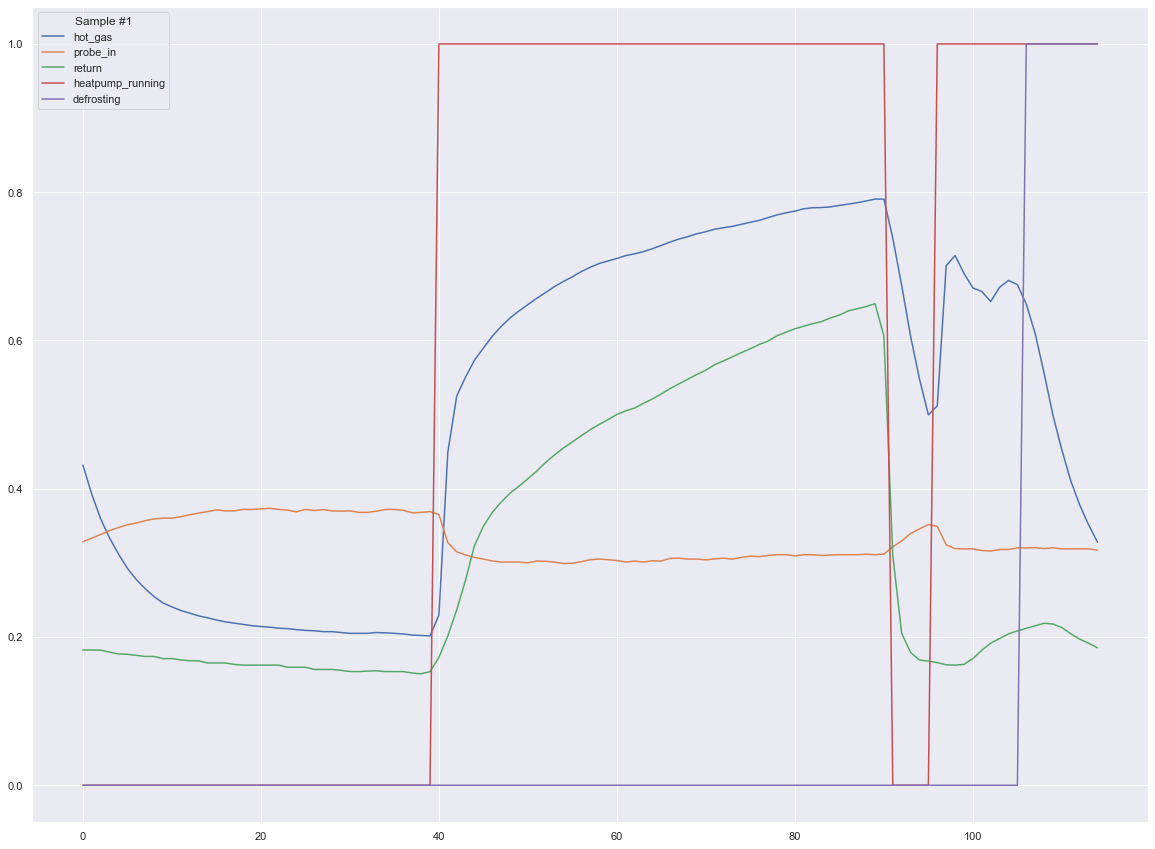

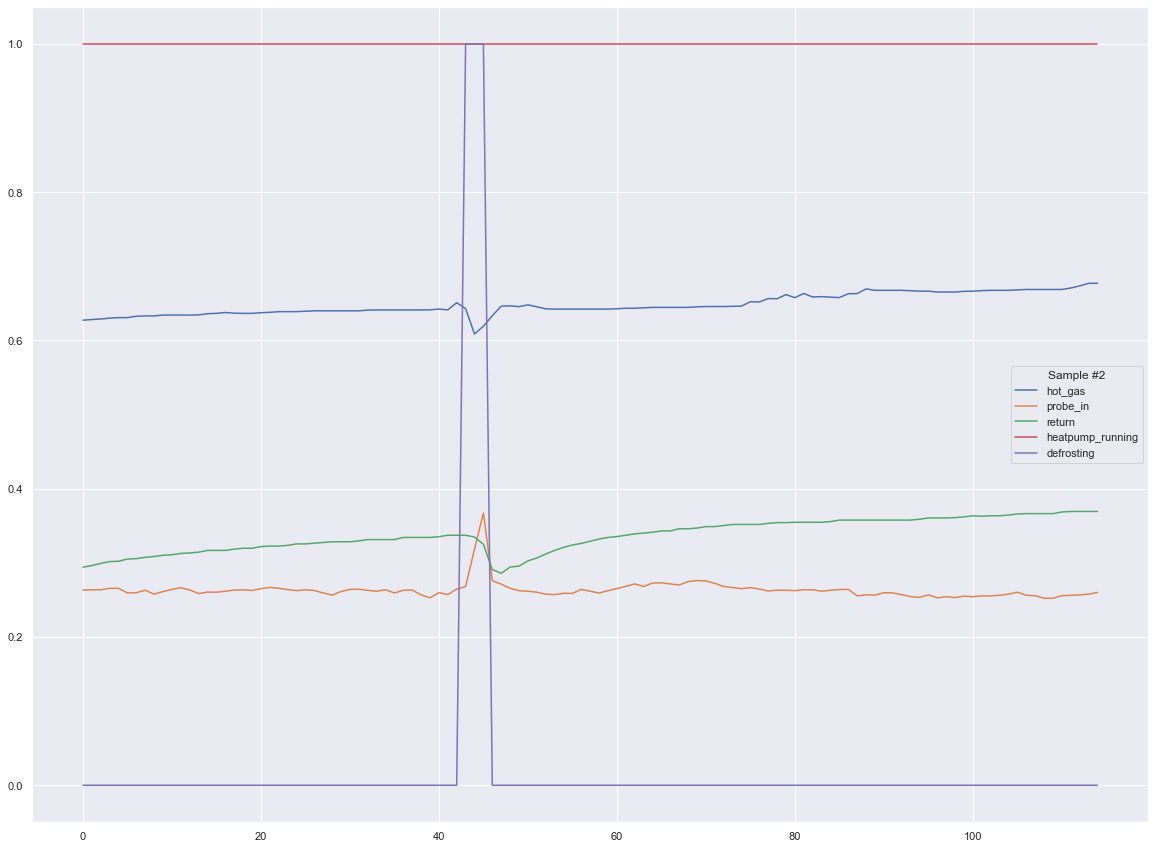

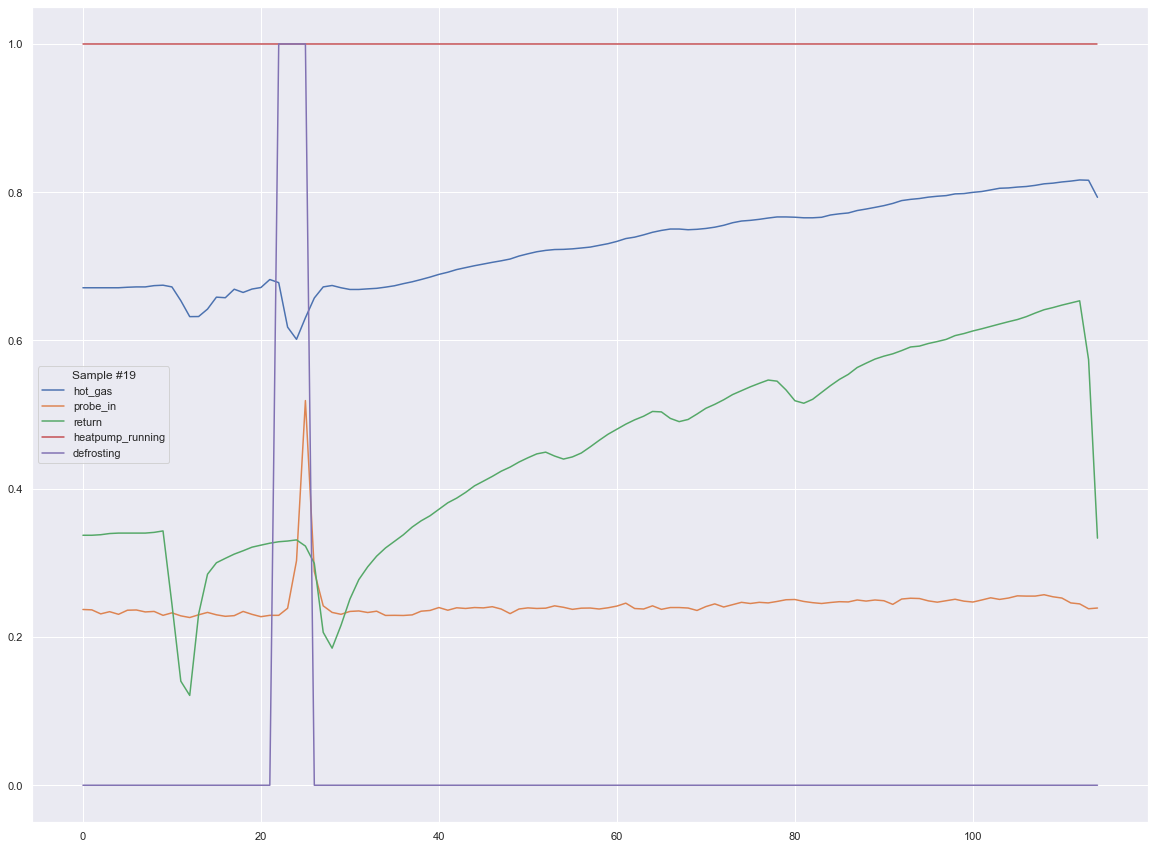

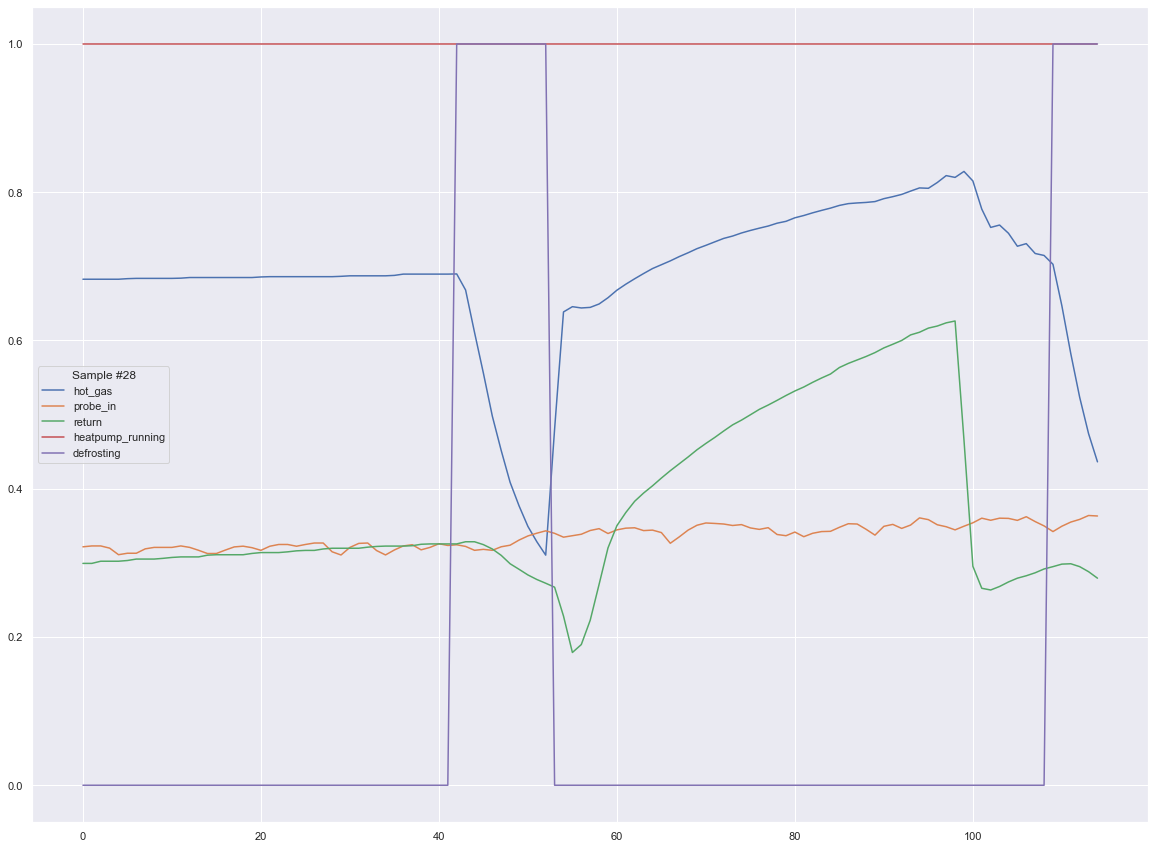

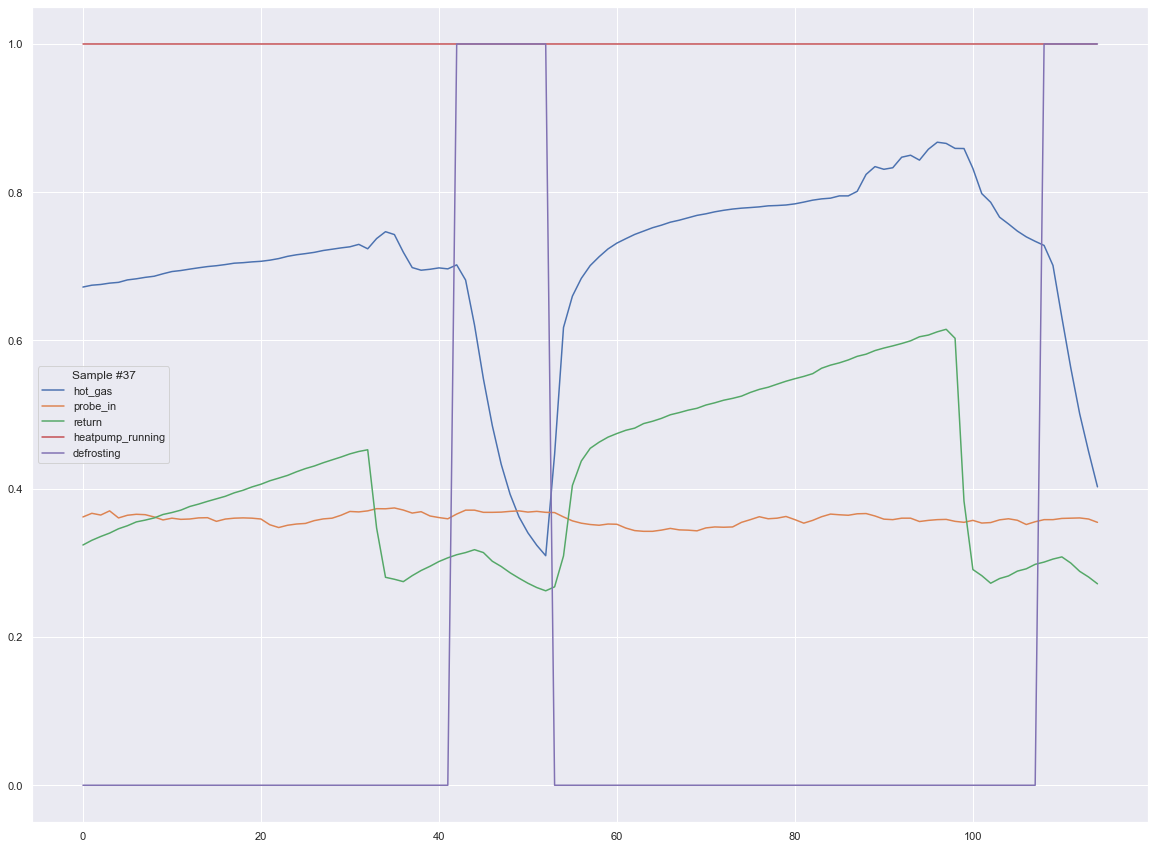

Show some NON-DEFROSTING samples:


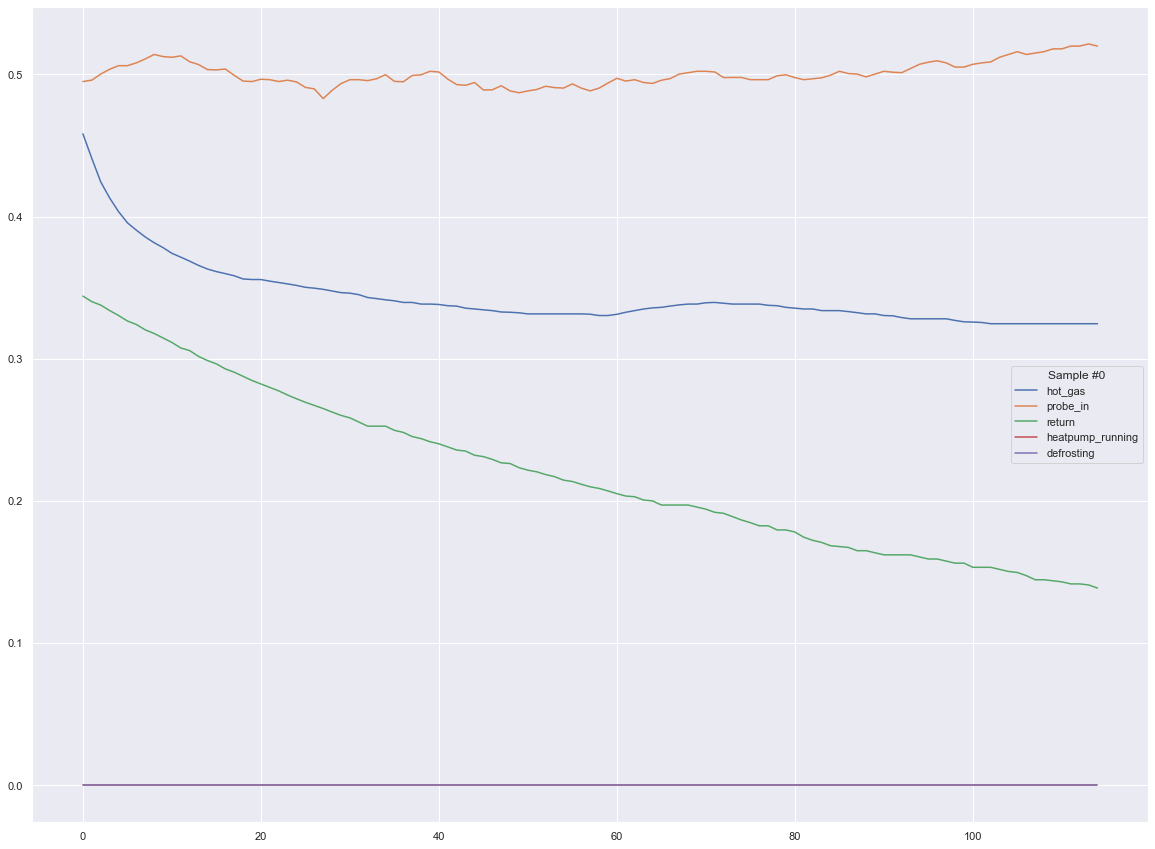

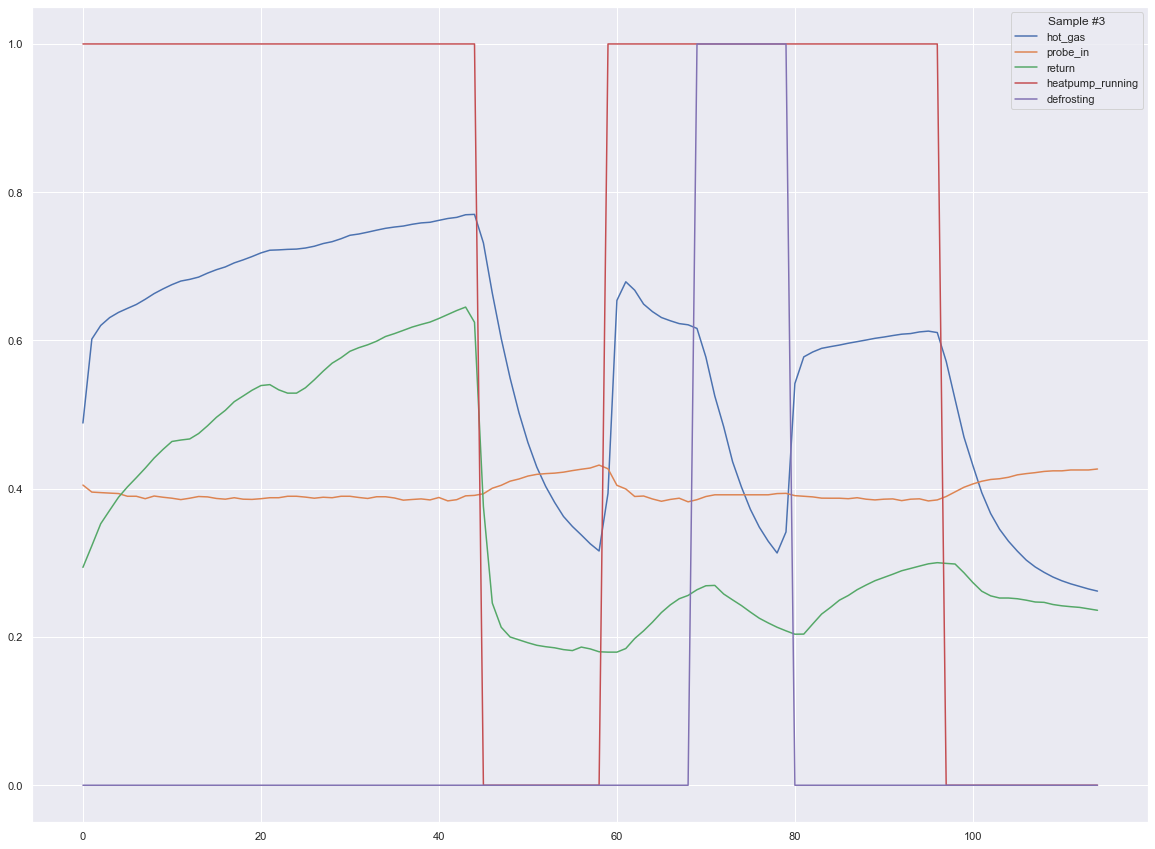

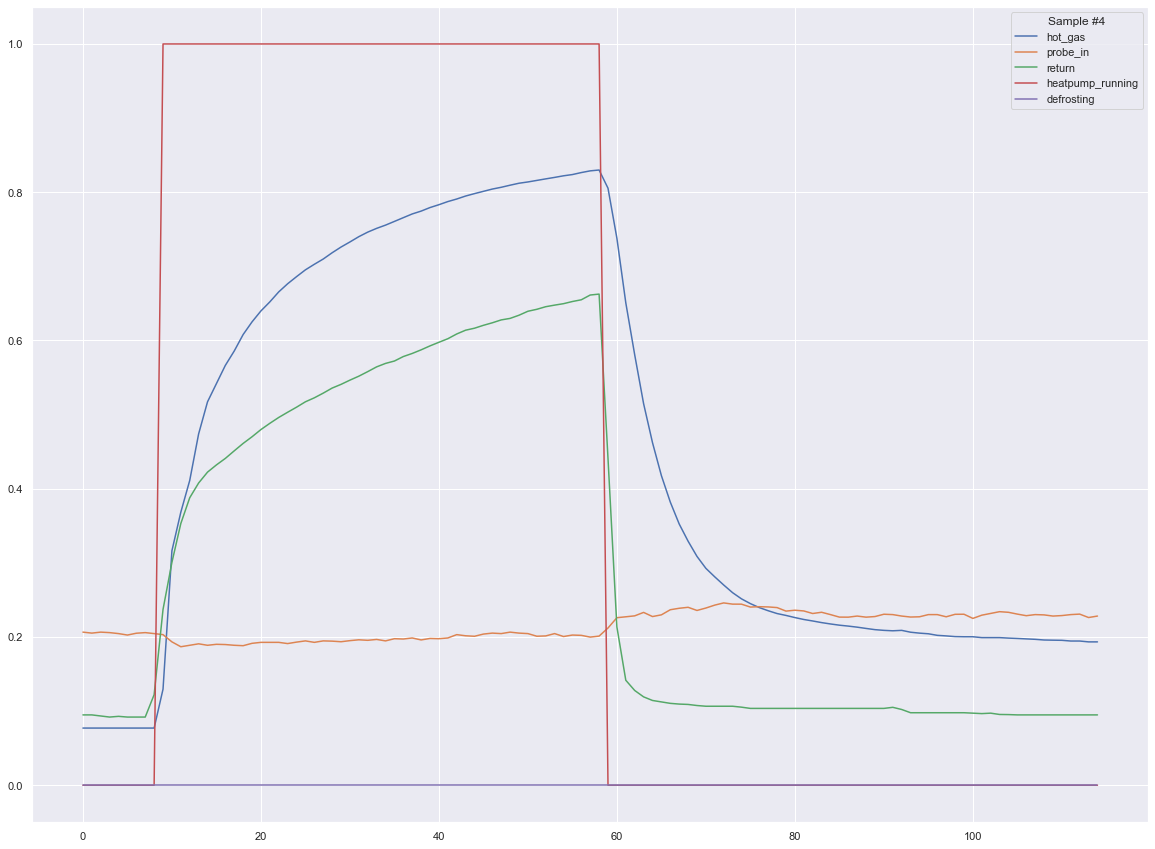

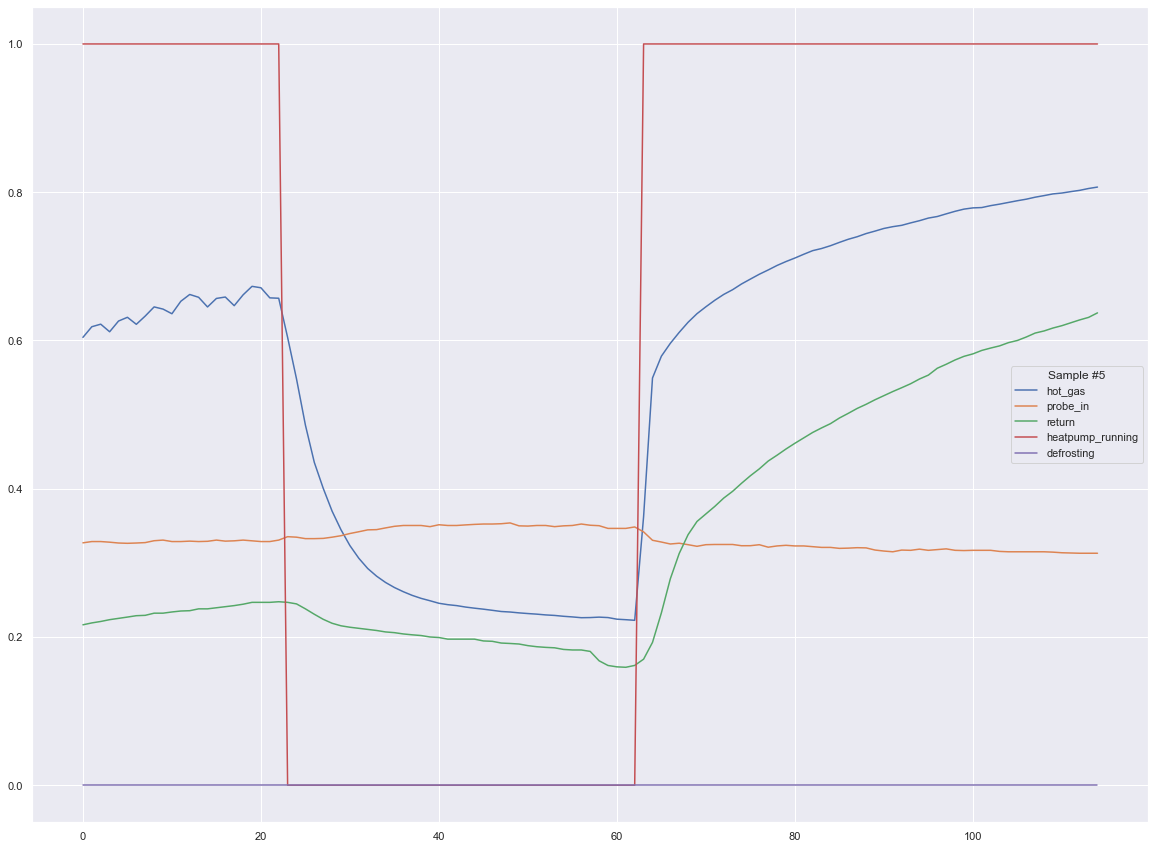

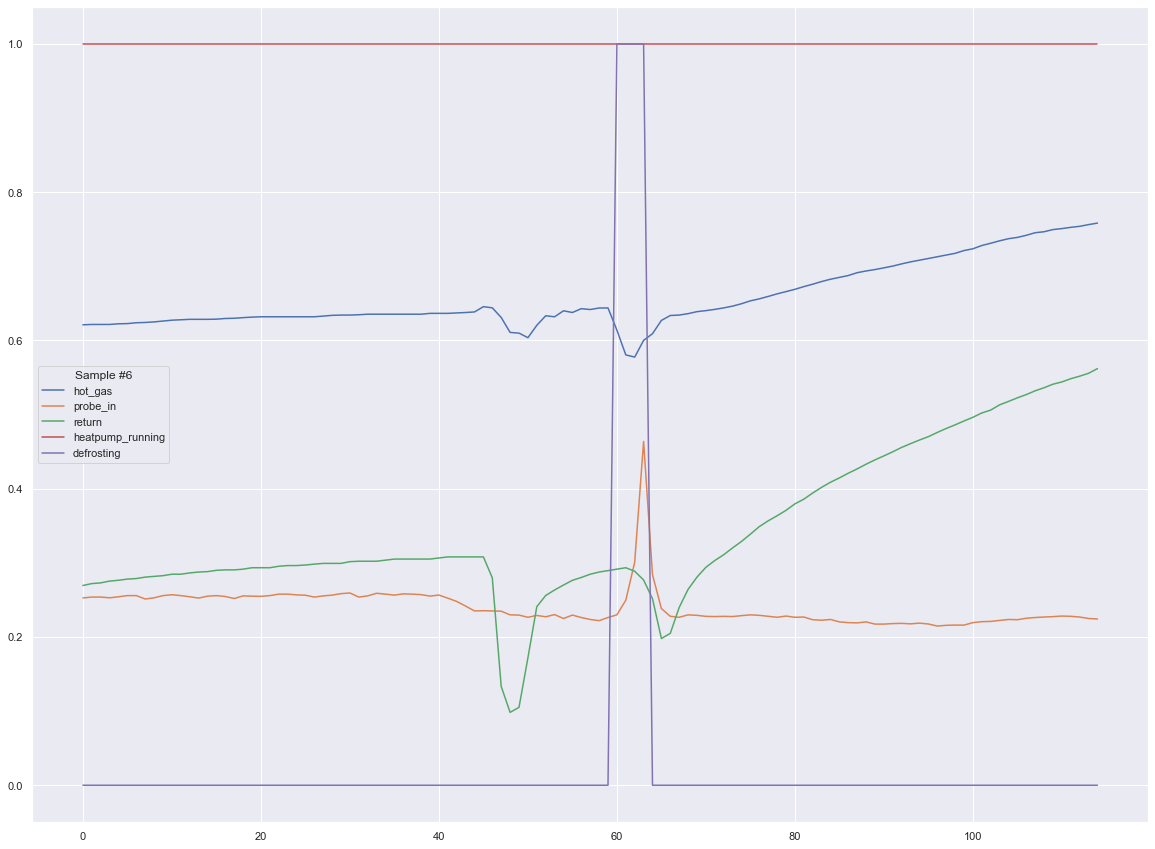

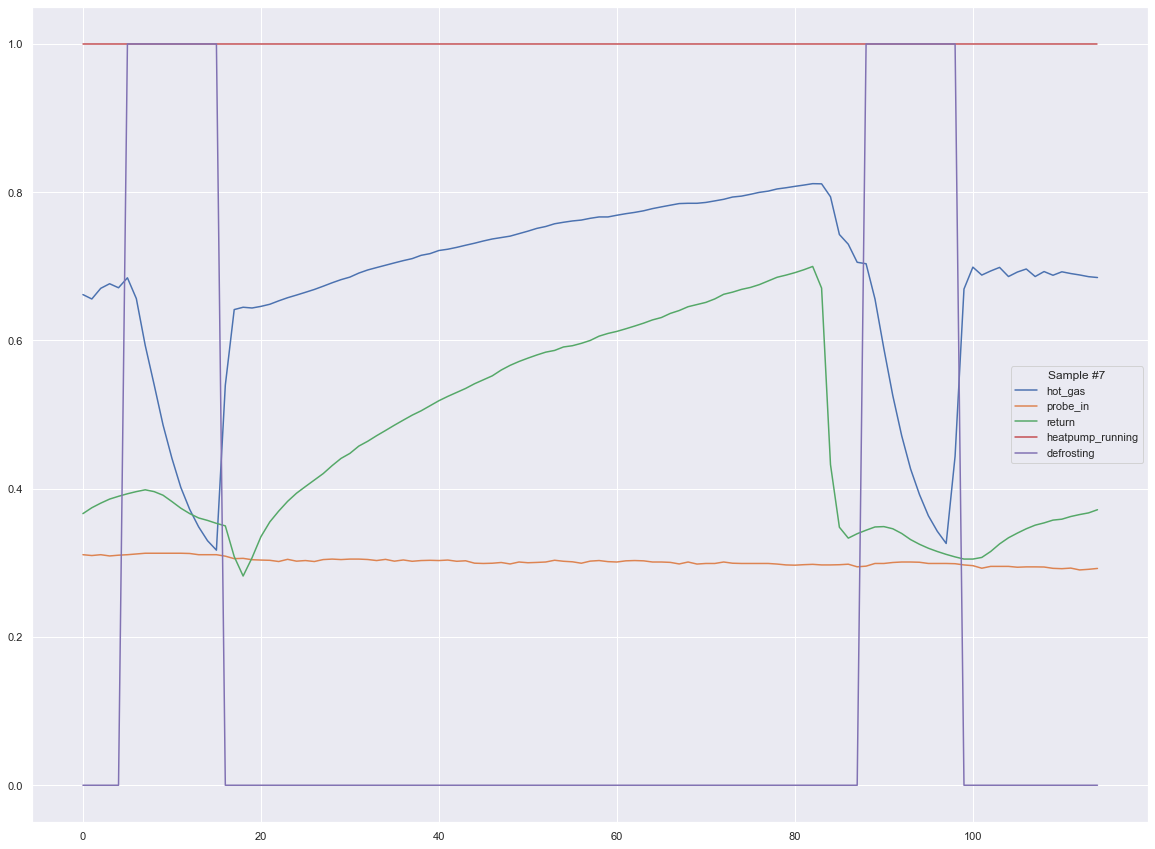

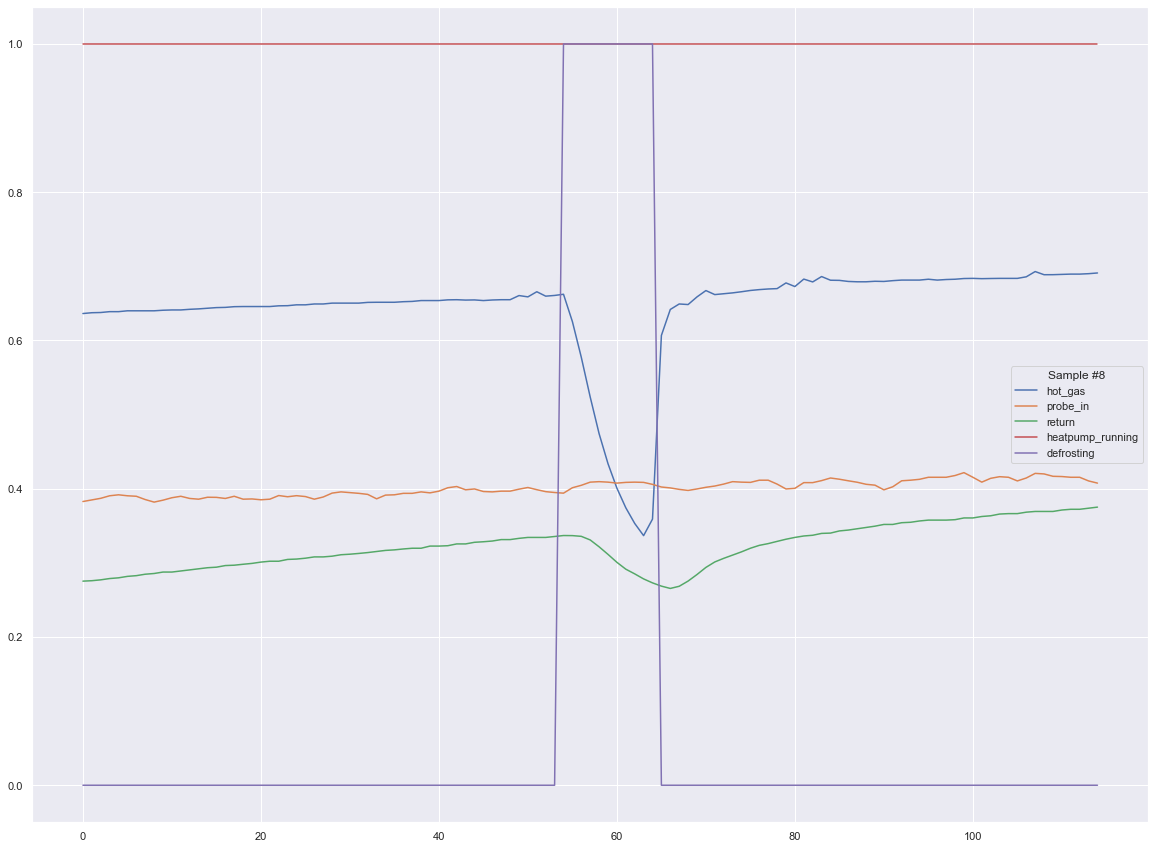

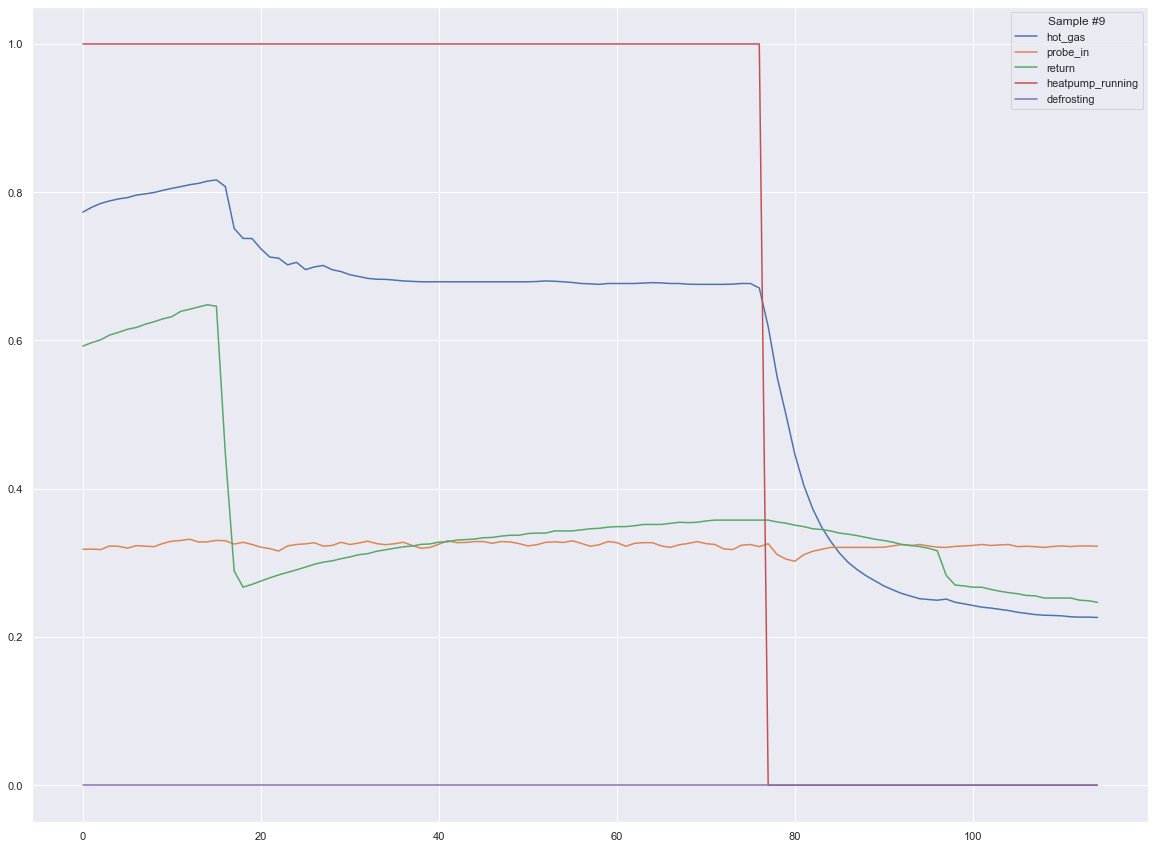

In [29]:

print("Show some DEFROSTING samples:")

for i in range(50):
    sample = train_dataset[i]
    if sample[1][-1].item() == 1.0:
        [plt_hot_gas, plt_probe_in, plt_return, plt_heatpump_running, plt_defrosting] = plt.plot(sample[0])
        plt.legend([plt_hot_gas, plt_probe_in, plt_return, plt_heatpump_running, plt_defrosting], ['hot_gas', 'probe_in', 'return', 'heatpump_running', 'defrosting'], title='Sample #{}'.format(i))
        plt.show()
    

print("Show some NON-DEFROSTING samples:")

for i in range(10):
    sample = train_dataset[i]
    if sample[1][-1].item() == 0.0:
        [plt_hot_gas, plt_probe_in, plt_return, plt_heatpump_running, plt_defrosting] = plt.plot(sample[0])
        plt.legend([plt_hot_gas, plt_probe_in, plt_return, plt_heatpump_running, plt_defrosting], ['hot_gas', 'probe_in', 'return', 'heatpump_running', 'defrosting'], title='Sample #{}'.format(i))
        plt.show()


Use Pytorchs DataLoader class to load and batch-sample samples from Datasets. We'll batch with 32 samples and drop all the rest do keep all batches the same size. Shuffling is not needed anymore as the Dataset is already shuffled.

In [30]:
batch_size = 32

train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=batch_size, batch_sampler=None, shuffle=False,
                                             num_workers=0, drop_last=True)

test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size=batch_size, batch_sampler=None, shuffle=False,
                                             num_workers=0, drop_last=True)



In [31]:
class Trainer:
    '''
    Trainer for pytorch models

    Use a loss function / criterion and optimizer to train a pytorch model for a number of epochs. After training the best epoch is re-printed and a picture of the train history is shown and written to a file. 
    '''
    def __init__(self, model, criterion, optimizer, picfile = None):
        ''' 
        INPUT
        model - the pytorch model to train
        criterion - the loss function to use. Important: The loss function needs to be based on raw, unnormalized scores for each class like CrossEntropyLoss
        optimizer - the pytorch optimizer to use for the training
        picfile (optional) - filename to write the training chart
        '''
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.picfile = picfile

        self.train_hist = []
        self.test_hist = []
        self.accuracy_hist = []

    def batch_accuracy(self, prediction, target):
        '''
        Calculate the accumulated weights for target and matching predictions for the batch. The accuracy can be calculated as match_weighted / target_weighted.

        INPUT
        prediction - Tensor with prediction, based on raw, unnormalized scores for each class with the length batch_size * len_seq
        target - Tensor with the target values, also based on a class index in the range of [0, 1] (0: normal, 1: defrosting) with the length batch_size * len_seq

        OUTPUT
        match_weighted - Accumulated weights of all matching predictions
        target_weighted - Accumulated weights of target
        '''
        _, predicted = torch.max(prediction, 1)

        match = (predicted == target)
        target_weighted = target.double()
        target_weighted[target_weighted==1] = train_weights[1] # fill in weights for label "defrosting"
        target_weighted[target_weighted==0] = train_weights[0] # fill in weights for label "normal"
        match_weighted = target_weighted * match

        return match_weighted.sum().item(), target_weighted.sum().item()


    def train_epoch(self, dataloader):
        '''
        Train one epoch

        INPUT
        dataloader - The Dataloader for training data

        OUTPUT
        train_loss - the loss calculated by the criterion loss function
        '''

        # input_dim: number of features at one timestep (3)
        # len_seq: number of timesteps in one sample (115)
        # batch_size: number of samples in a batch (32)
        # output_dim: raw output logits for normal and defrost happening (2)

        self.model.train()
        running_loss = 0.0
        for j,batch in enumerate(dataloader):
            x_train = batch[0] # [batch_size, len_seq, input_dim]
            y_train = batch[1] # [batch_size, len_seq]
            y_train = y_train.reshape(-1) # [batch_size, len_seq] -> [batch_size * len_seq]

            self.optimizer.zero_grad()

            y_pred = self.model(x_train) # [batch_size * len_seq, output_dim]

            loss = self.criterion(y_pred, y_train) # criterion(input, target)

            running_loss += loss.item() * x_train.size(0)

            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 5) #  Clip exploding gradients
            self.optimizer.step()
        return running_loss / ((j+1)*dataloader.batch_size)

    def test_batch(self, batch): 
        '''
        Test one batch of samples

        INPUT
        batch - Tensor with sample data and the dimension [batch_size, len_seq, output_dim]

        OUTPUT
        y_pred - Prediction for samples with the dimension [batch_size * len_seq, output_dim]
        '''
        
        with torch.no_grad():
            self.model.eval()
            
            y_pred = self.model(batch) # [batch_size * len_seq, output_dim]
        return y_pred

    def test_epoch(self, dataloader):
        '''
        Test one epoch without changing the parameter of the model

        INPUT
        dataloader - The Dataloader for test data

        OUTPUT
        test_loss - the loss calculated by the criterion loss function
        test_accuracy - the weighted accuracy for this epoch
        '''
        with torch.no_grad():
            self.model.eval()

            total = 0
            correct = 0
            running_loss = 0.0
            for j,batch in enumerate(dataloader):
                x_test = batch[0] # [batch_size, len_seq, input_dim]
                y_test = batch[1] # [batch_size, len_seq]
                y_test = y_test.reshape(-1) # [batch_size, len_seq] -> [batch_size * len_seq]

                y_pred = self.model(x_test) # [batch_size * len_seq, output_dim]

                loss = self.criterion(y_pred, y_test) # criterion(input, target)

                match_weighted, target_weighted = self.batch_accuracy(y_pred.data, y_test)
                total += target_weighted
                correct += match_weighted

                running_loss += loss.item() * x_test.size(0)

        return running_loss / ((j+1)*test_dataloader.batch_size), correct / total

    def train(self, train_dataloader, test_dataloader, epochs = 100):
        '''
        Train the model for a number of epochs based on data from train_dataloader and test against test_dataloader. After the training a picture with the training chart is created.

        INPUT
        train_dataloader - The Dataloader for training data
        test_dataloader - The Dataloader for test data
        epochs - the number of epochs to train the model
        '''

        print("Model: ", self.model)
        best_epoche = 0

        for i in range(epochs):
            train_loss = self.train_epoch(train_dataloader)

            self.train_hist.append(train_loss)

            test_loss, test_accuracy = self.test_epoch(test_dataloader)

            self.test_hist.append(test_loss)
            self.accuracy_hist.append(test_accuracy)

            if i%1 == 0:
                print("Epoch #", i+1, ": Train: ",self.train_hist[i], " / ", self.test_hist[i], " / ", self.accuracy_hist[i])
            
            if test_accuracy > self.accuracy_hist[best_epoche]:
                best_epoche = i
            
        sns.set(rc={'figure.figsize':(10, 5)})
        plt.plot(self.train_hist, label='train')
        plt.plot(self.test_hist, label='test')
        plt.plot(self.accuracy_hist, label='accuracy')
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.legend()
        if self.picfile is not None:
            plt.gcf().savefig(self.picfile)
        plt.show()
        
        print("Best Epoch #", best_epoche+1, ": Train: ",self.train_hist[best_epoche], " / ", self.test_hist[best_epoche], " / ", self.accuracy_hist[best_epoche])
        

In [ ]:
Let's try different network architectures...

In [42]:
class DefrostLSTMLin(nn.Module):
    '''
    Pytorch model to predict defrosting events based on LSTM layer(s) and a linear classifier layer.
    '''
    def __init__(self, input_dim, lstm_hidden_dim, lstm_num_layers=2, lstm_dropout = 0.0, output_dim=2, output_dropout = 0.0):
        '''
        INPUT
        input_dim - number of input features
        lstm_hidden_dim - size of hidden layer in the LSTM
        lstm_num_layers (optional) - number of stacked LSTM layer(s). Default: 2
        lstm_dropout (optional) - dropout for the LSTM layer(s). Default: 0.0 / no dropout
        output_dim (optional) - number of classes to train for. Default: 2
        output_dropout (optional) - dropout for the last linear layer. Default: 0.0 / no dropout
        '''
        super(DefrostLSTMLin, self).__init__()
        self.input_dim = input_dim
        self.lstm_hidden_dim = lstm_hidden_dim
        self.lstm_num_layers = lstm_num_layers

        # NN layers
        # input -> LSTM+Dropout -> Linear -> Dropout -> output
        self.lstm = nn.LSTM(self.input_dim, self.lstm_hidden_dim, self.lstm_num_layers, dropout = lstm_dropout, batch_first = True)
        self.linear = nn.Linear(self.lstm_hidden_dim, output_dim)
        self.dropout = nn.Dropout(output_dropout)

    def forward(self, input):
        '''
        Forward pass through all layers

        INPUT
        input - input features with dimensions [batch_size, seq_len, input_dim]

        OUTPUT
        y_pred - prediction with dimensions [batch_size * seq_len, output_dim]
        '''
        # input: [batch_size, seq_len, input_dim]

        # Forward pass through LSTM layer

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        lstm_out, self.hidden = self.lstm(input) #  -> [batch_size, seq_len, hidden_dim], (hidden, cell)

        # Forward pass through linear layer

        lstm_out = lstm_out.reshape(-1, self.lstm_hidden_dim) # [batch_size * seq_len, hidden_dim]
        y_pred = self.linear(lstm_out) # [batch_size * seq_len, output_dim]

        # Forward pass through dropout layer
        y_pred = self.dropout(y_pred) # [batch_size * seq_len, output_dim]
        return y_pred



Model:  DefrostLSTMLin(
  (lstm): LSTM(5, 20, batch_first=True)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
Epoch # 1 : Train:  0.39093256094562473  /  0.27915680016341965  /  0.886149587278787
Epoch # 2 : Train:  0.26088188575274907  /  0.23652188813215808  /  0.8953198626116177
Epoch # 3 : Train:  0.23838948745336105  /  0.22512350780399223  /  0.8999978130893834
Epoch # 4 : Train:  0.23109369718316775  /  0.2202092460111568  /  0.9004774747380537
Epoch # 5 : Train:  0.22662460906292076  /  0.2145237059969651  /  0.9018179913107556
Epoch # 6 : Train:  0.22327924877849978  /  0.21176297335248245  /  0.9022007608640289
Epoch # 7 : Train:  0.2204297156031452  /  0.21314387376371183  /  0.9013664590833713
Epoch # 8 : Train:  0.21864586041044834  /  0.20931601740027728  /  0.9021827134618579
Epoch # 9 : Train:  0.21626204176625208  /  0.20627105824257197  /  0.901402108722193
Epoch # 10 : Train:  0.21384773045333463  /  0.2018

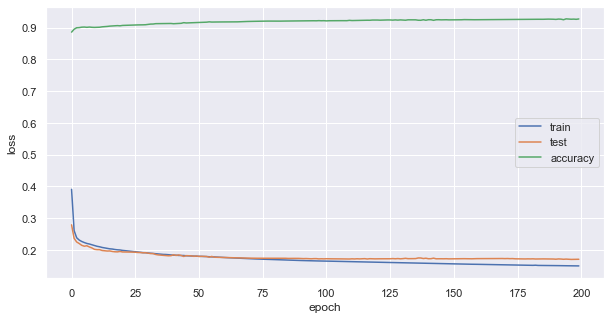

Best Epoch # 195 : Train:  0.15018833711076138  /  0.17115401466818234  /  0.9280180204346601


In [64]:

model = DefrostLSTMLin(input_dim = len(input_cols), lstm_hidden_dim = 20, lstm_num_layers=1, lstm_dropout = 0.0)
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_A_20x1xlstm+lin.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)


And I tested also the Adam optimizer, but the training was a little bit slower especially at the beginning, so I used RMSprop instead to be able to get faster results.

Model:  DefrostLSTMLin(
  (lstm): LSTM(5, 20, batch_first=True)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
Epoch # 1 : Train:  0.42274526949249097  /  0.3152569404950267  /  0.862970630563157
Epoch # 2 : Train:  0.2712910552078219  /  0.24694221525600082  /  0.896093627481052
Epoch # 3 : Train:  0.24817902094392635  /  0.22929697189676135  /  0.8999832542170145
Epoch # 4 : Train:  0.2358082158796823  /  0.21882175085575958  /  0.9012794026261727
Epoch # 5 : Train:  0.2291871567270649  /  0.2141074479410523  /  0.9024235564078011
Epoch # 6 : Train:  0.22333122905510575  /  0.21107332231967071  /  0.901728989004269
Epoch # 7 : Train:  0.2203815521588966  /  0.20844799986011103  /  0.9025828360710814
Epoch # 8 : Train:  0.2175596560115245  /  0.20659819323765605  /  0.903487420808099
Epoch # 9 : Train:  0.2157709504241374  /  0.20480837496487717  /  0.904468229641316
Epoch # 10 : Train:  0.21363705472270056  /  0.204788612299

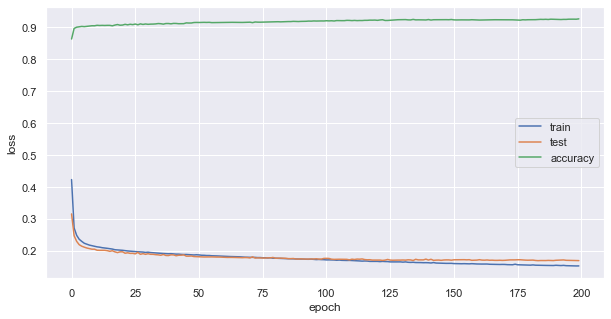

Best Epoch # 200 : Train:  0.152416832900759  /  0.16902661058855684  /  0.9260771491613508


In [37]:
model = DefrostLSTMLin(input_dim = len(input_cols), lstm_hidden_dim = 20, lstm_num_layers=1, lstm_dropout = 0.0)
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_A2_20x1xlstm+lin.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)

Model:  DefrostLSTMLin(
  (lstm): LSTM(5, 20, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
Epoch # 1 : Train:  0.38084610909668365  /  0.26830979534669924  /  0.8897087780080756
Epoch # 2 : Train:  0.2603465307114729  /  0.23723291860599266  /  0.8984743362875369
Epoch # 3 : Train:  0.24391584596527158  /  0.22691969063721204  /  0.9006801762381743
Epoch # 4 : Train:  0.2357477662278645  /  0.2214234734052106  /  0.9021805828268824
Epoch # 5 : Train:  0.23076608278858127  /  0.2161912927894216  /  0.9029506547823454
Epoch # 6 : Train:  0.22711108313567602  /  0.21439237873020925  /  0.9026938110757121
Epoch # 7 : Train:  0.223631923901501  /  0.2103288375625485  /  0.9044683052354613
Epoch # 8 : Train:  0.220803053921728  /  0.20847663283348083  /  0.9039909086113576
Epoch # 9 : Train:  0.2186582141402942  /  0.20635310462430903  /  0.9047032658370106
Epoch # 10 : Train:  0.21703989679244026  /

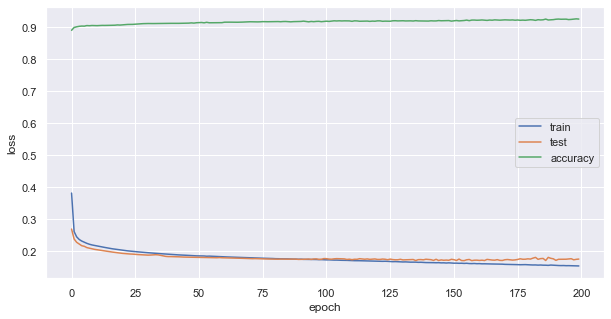

Best Epoch # 199 : Train:  0.15328376310974803  /  0.17368920353290282  /  0.9254785359258615


In [43]:
model = DefrostLSTMLin(input_dim = len(input_cols), lstm_hidden_dim = 20, lstm_num_layers=1, lstm_dropout = 0.2)
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_B_20x1xlstm_do+lin.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)



Model:  DefrostLSTMLin(
  (lstm): LSTM(5, 30, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=30, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
Epoch # 1 : Train:  0.3411896300404819  /  0.24714463674708417  /  0.8941238288482593
Epoch # 2 : Train:  0.2475606359652619  /  0.22978335697399943  /  0.8993482689986518
Epoch # 3 : Train:  0.235076585723393  /  0.2211049255964003  /  0.9011869201892331
Epoch # 4 : Train:  0.22821536637953857  /  0.21440384615408747  /  0.901903334300668
Epoch # 5 : Train:  0.2222201168092329  /  0.20830991893614592  /  0.9033633484179027
Epoch # 6 : Train:  0.21770453653228816  /  0.20533420518040657  /  0.9030342507075736
Epoch # 7 : Train:  0.21296353994020775  /  0.20511074030869886  /  0.9041026619557028
Epoch # 8 : Train:  0.20896307968381625  /  0.20007136738614031  /  0.9049871610484179
Epoch # 9 : Train:  0.20627675510164517  /  0.19668408100934406  /  0.9064390557945241
Epoch # 10 : Train:  0.204327662222421  

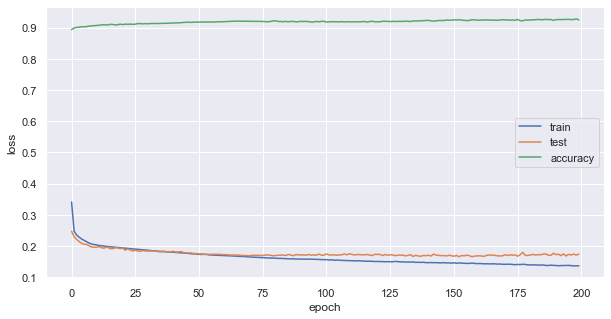

Best Epoch # 199 : Train:  0.13651877147937888  /  0.17078683309649167  /  0.9285992330178855


In [44]:
model = DefrostLSTMLin(input_dim = len(input_cols), lstm_hidden_dim = 30, lstm_num_layers=1, lstm_dropout = 0.2)
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_C_30x1xlstm_do+lin.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)


Model:  DefrostLSTMLin(
  (lstm): LSTM(5, 20, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
Epoch # 1 : Train:  0.37634124373322103  /  0.2533026443500268  /  0.8949052847220018
Epoch # 2 : Train:  0.2535840629196879  /  0.22906826612980744  /  0.8992692059223402
Epoch # 3 : Train:  0.23761830547852303  /  0.21988887908427338  /  0.901857835024732
Epoch # 4 : Train:  0.2303284831456284  /  0.21464236806097783  /  0.9024443699957219
Epoch # 5 : Train:  0.2246580707493113  /  0.2085257237286944  /  0.904259771787044
Epoch # 6 : Train:  0.2190229902961361  /  0.20457754480211357  /  0.9056457960350306
Epoch # 7 : Train:  0.2144405239553594  /  0.1992736058799844  /  0.9078075170028241
Epoch # 8 : Train:  0.2100032966528366  /  0.1947124161218342  /  0.9086221979031818
Epoch # 9 : Train:  0.20615436501467405  /  0.19177317521289775  /  0.9092445141028006
Epoch # 10 : Train:  0.20259635

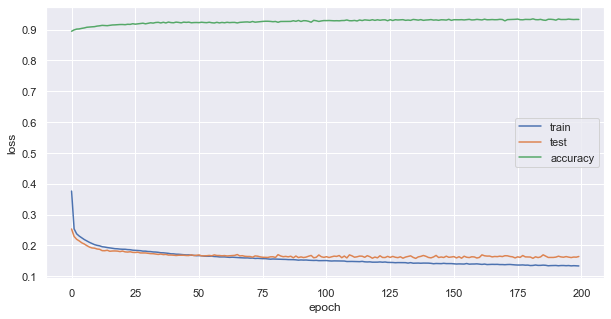

Best Epoch # 182 : Train:  0.1350963255807535  /  0.15822223044539752  /  0.9351036192323585


In [45]:
model = DefrostLSTMLin(input_dim = len(input_cols), lstm_hidden_dim = 20, lstm_num_layers=2, lstm_dropout = 0.2)
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_D_20x2xlstm_do+lin.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)

Model:  DefrostLSTMLin(
  (lstm): LSTM(5, 20, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch # 1 : Train:  0.3534092123828717  /  0.24572955307207608  /  0.893747829170638
Epoch # 2 : Train:  0.2773274995052992  /  0.22728047539529048  /  0.8973028230249877
Epoch # 3 : Train:  0.2647366074483786  /  0.21809766892539828  /  0.9014127674966365
Epoch # 4 : Train:  0.2594633968908395  /  0.21466480528837756  /  0.9014306329129032
Epoch # 5 : Train:  0.25354996412547665  /  0.20854072998228826  /  0.9022365504920075
Epoch # 6 : Train:  0.24712609452987785  /  0.20431877221716077  /  0.9025031906398749
Epoch # 7 : Train:  0.2444998601034506  /  0.2022548847292599  /  0.9036947587491116
Epoch # 8 : Train:  0.24161114007679385  /  0.19938134009900846  /  0.9042021522498618
Epoch # 9 : Train:  0.23855674760555154  /  0.20215491813264394  /  0.9033796039588586
Epoch # 10 : Train:  0.235

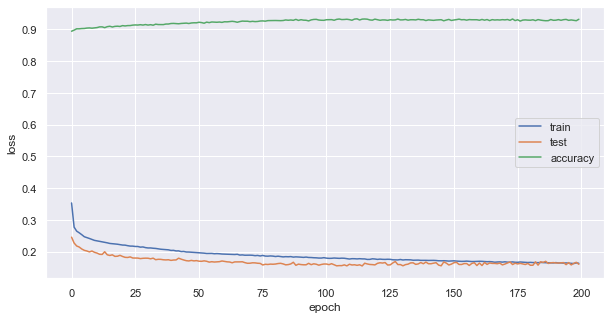

Best Epoch # 113 : Train:  0.1773262445828808  /  0.1571852657943964  /  0.9327350278873379


In [46]:
model = DefrostLSTMLin(input_dim = len(input_cols), lstm_hidden_dim = 20, lstm_num_layers=2, lstm_dropout = 0.2, output_dropout = 0.2)
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_E_20x2xlstm_do+lin+do.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)



In [47]:
class DefrostCNNLSTM(nn.Module):

    '''
    Pytorch model to predict defrosting events based on a CNN, LSTM layer(s) and a linear classifier layer.
    '''
    def __init__(self, input_dim, lstm_input_dim, lstm_hidden_dim, lstm_num_layers=2, lstm_dropout = 0.0, output_dim=2, output_dropout = 0.0):
        '''
        INPUT
        input_dim - number of input features
        lstm_hidden_dim - size of hidden layer in the LSTM
        lstm_num_layers (optional) - number of stacked LSTM layer(s). Default: 2
        lstm_dropout (optional) - dropout for the LSTM layer(s). Default: 0.0 / no dropout
        output_dim (optional) - number of classes to train for. Default: 2
        output_dropout (optional) - dropout for the last linear layer. Default: 0.0 / no dropout
        '''
        super(DefrostCNNLSTM, self).__init__()
        self.input_dim = input_dim
        self.lstm_input_dim = lstm_input_dim
        self.lstm_hidden_dim = lstm_hidden_dim
        self.lstm_num_layers = lstm_num_layers

        # NN layers
        # input -> CNN + Relu -> LSTM+Dropout -> Linear -> Dropout -> output
        
        self.conv = nn.Conv1d(self.input_dim, self.lstm_input_dim, kernel_size=5, padding=2, padding_mode = 'replicate')
        self.lstm = nn.LSTM(self.lstm_input_dim, self.lstm_hidden_dim, self.lstm_num_layers, dropout = lstm_dropout, batch_first = True)
        self.linear = nn.Linear(self.lstm_hidden_dim, output_dim)
        self.dropout = nn.Dropout(output_dropout)

    def forward(self, input):
        '''
        Forward pass through all layers

        INPUT
        input - input features with dimensions [batch_size, seq_len, input_dim]

        OUTPUT
        y_pred - prediction with dimensions [batch_size * seq_len, output_dim]
        '''
        # input: [batch_size, seq_len, input_dim]

        input = input.reshape(-1, self.input_dim, input.size(1)) # [batch_size, lstm_input_dim, seq_len]
        # Forward pass through CNN layer

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        cnn_out = F.relu(self.conv(input)) #  -> [batch_size, seq_len, lstm_hidden_dim], (hidden, cell)

        # Forward pass through LSTM layer

        lstm_in = cnn_out.reshape(-1, cnn_out.size(2), self.lstm_input_dim) # [batch_size, seq_len, lstm_input_dim]

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        lstm_out, self.hidden = self.lstm(lstm_in) #  -> [batch_size, seq_len, lstm_hidden_dim], (hidden, cell)

        # Forward pass through linear layer

        lstm_out = lstm_out.reshape(-1, self.lstm_hidden_dim) # [batch_size * seq_len, lstm_hidden_dim]
        y_pred = self.linear(lstm_out) # [batch_size * seq_len, output_dim]

        # Forward pass through dropout layer

        y_pred = self.dropout(y_pred) # [batch_size * seq_len, output_dim]

        return y_pred


Model:  DefrostCNNLSTM(
  (conv): Conv1d(5, 5, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=replicate)
  (lstm): LSTM(5, 20, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
Epoch # 1 : Train:  0.5189288640200203  /  0.5062879484735037  /  0.7471008238504704
Epoch # 2 : Train:  0.4800188603685863  /  0.480157781196268  /  0.7594628323733514
Epoch # 3 : Train:  0.42392286008863306  /  0.3596420774334355  /  0.8340241821582149
Epoch # 4 : Train:  0.29557030952688473  /  0.18912020541335406  /  0.9233835141919987
Epoch # 5 : Train:  0.16801832127037333  /  0.12899768332901754  /  0.9493320695933477
Epoch # 6 : Train:  0.13012571503866965  /  0.10746269604485285  /  0.9586173992148552
Epoch # 7 : Train:  0.10977823637537103  /  0.08911617928625722  /  0.9643339124526124
Epoch # 8 : Train:  0.09599596393197331  /  0.08025512447286594  /  0.9669086770288565
Epoch # 9 : Train:  

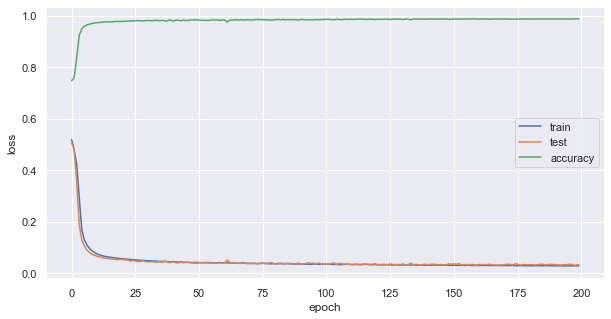

Best Epoch # 198 : Train:  0.028088146159008367  /  0.030763816872709675  /  0.9877936230229575


In [48]:
model = DefrostCNNLSTM(input_dim = len(input_cols), lstm_input_dim = 5, lstm_hidden_dim = 20, lstm_num_layers=2, lstm_dropout = 0.2)
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_F_5x5cnn+20x2xlstm_do+lin+do.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)

Model:  DefrostCNNLSTM(
  (conv): Conv1d(5, 5, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=replicate)
  (lstm): LSTM(5, 20, num_layers=3, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
Epoch # 1 : Train:  0.5464960071577954  /  0.57503849699309  /  0.7471008238504704
Epoch # 2 : Train:  0.5347253527214278  /  0.5285510444327405  /  0.7466601407827841
Epoch # 3 : Train:  0.49723462257812273  /  0.5140110650344899  /  0.7550378395032098
Epoch # 4 : Train:  0.48753896720373807  /  0.5003147003682036  /  0.7575476771082557
Epoch # 5 : Train:  0.4567525165294533  /  0.40706642207346466  /  0.8018783851530593
Epoch # 6 : Train:  0.3054711747525343  /  0.21394095060072446  /  0.9081867784278129
Epoch # 7 : Train:  0.1708030795873101  /  0.13934945246498837  /  0.9399273376199341
Epoch # 8 : Train:  0.13187967045093651  /  0.1162668247952273  /  0.9479633396058652
Epoch # 9 : Train:  0.1142

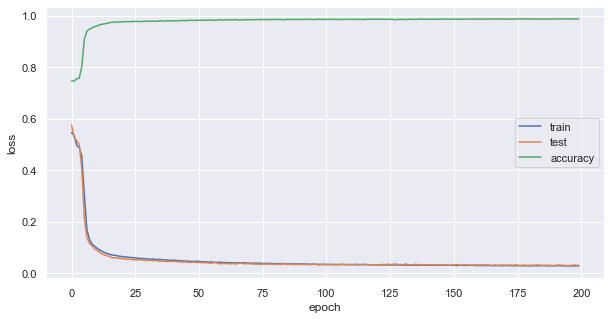

Best Epoch # 200 : Train:  0.028786175589619288  /  0.03069235574405052  /  0.988004914257775


In [61]:
model = DefrostCNNLSTM(input_dim = len(input_cols), lstm_input_dim = 5, lstm_hidden_dim = 20, lstm_num_layers=3, lstm_dropout = 0.2)
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_G_5x5cnn+20x3xlstm_do+lin+do.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)

Model:  DefrostCNNLSTM(
  (conv): Conv1d(5, 5, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=replicate)
  (lstm): LSTM(5, 30, num_layers=3, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=30, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
Epoch # 1 : Train:  0.5242528918074139  /  0.49824991351679754  /  0.7471008238504704
Epoch # 2 : Train:  0.4158467595256976  /  0.318650913277739  /  0.861701206084145
Epoch # 3 : Train:  0.2515594443723337  /  0.21761436172221837  /  0.8954052783958916
Epoch # 4 : Train:  0.20127138264143646  /  0.19038597994336956  /  0.9126083807605634
Epoch # 5 : Train:  0.1749201346689196  /  0.16874436367499202  /  0.9248200885247195
Epoch # 6 : Train:  0.1565122859246695  /  0.14149690850784905  /  0.938198289540241
Epoch # 7 : Train:  0.14289299065052574  /  0.12556772728107476  /  0.9459045162683207
Epoch # 8 : Train:  0.12889205434206708  /  0.1274504954191415  /  0.9459041774945597
Epoch # 9 : Train:  0.12

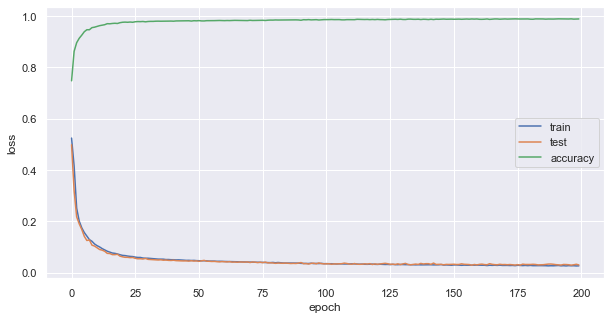

Best Epoch # 192 : Train:  0.028228114820571977  /  0.030605174821654434  /  0.9882675703142233


In [62]:

model = DefrostCNNLSTM(input_dim = len(input_cols), lstm_input_dim = 5, lstm_hidden_dim = 30, lstm_num_layers=3, lstm_dropout = 0.2)
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_H_5x5cnn+30x3xlstm_do+lin+do.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)


Model:  DefrostCNNLSTM(
  (conv): Conv1d(5, 10, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=replicate)
  (lstm): LSTM(10, 30, num_layers=3, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=30, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
Epoch # 1 : Train:  0.4462025003646737  /  0.25157686518995387  /  0.882297374045029
Epoch # 2 : Train:  0.19864513669440995  /  0.147411361434742  /  0.9384362459097586
Epoch # 3 : Train:  0.12505124062299727  /  0.09215858965916068  /  0.9635739869112775
Epoch # 4 : Train:  0.08843465061552488  /  0.07203183671165454  /  0.972217905812098
Epoch # 5 : Train:  0.07144040671079906  /  0.06029592067199318  /  0.9761117574208305
Epoch # 6 : Train:  0.061937034174577514  /  0.05043891915365269  /  0.9800484765093394
Epoch # 7 : Train:  0.05384898882970881  /  0.043035859364624084  /  0.982740398011405
Epoch # 8 : Train:  0.04852752863471188  /  0.03880892306762306  /  0.9848792727487123
Epoch # 9 : Trai

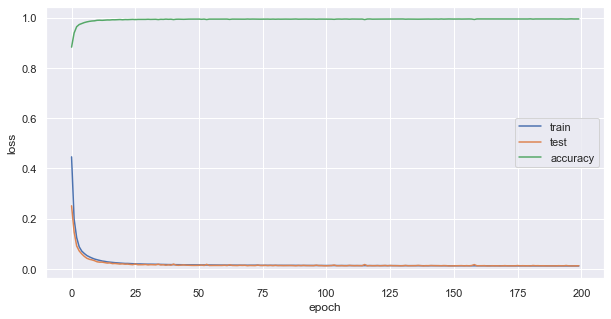

Best Epoch # 190 : Train:  0.012481785366144865  /  0.012866285237434664  /  0.994810117573002


In [63]:
model = DefrostCNNLSTM(input_dim = len(input_cols), lstm_input_dim = 10, lstm_hidden_dim = 30, lstm_num_layers=3, lstm_dropout = 0.2)
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_I_5x10cnn+30x3xlstm_do+lin+do.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)

In [ ]:
Calculate the number of parameters for the last model:

In [71]:
def get_number_of_params(model):
    '''
    Get number of parameters of a pytorch model

    INPUT
    model - pytorch model

    OUTPUT
    n_params - the number of parameters
    '''
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Number of parameter: ", get_number_of_params(model))



Number of parameter:  20242
